In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from statistics import mean

from speckle_stats_compile_scan_battery_results import get_speckle_stats_dnn_and_das, get_df

In [2]:
identifier = '*'
df = get_df(identifier)

# Load data from all three experiments
# 1. Simulated Anechoic cysts
scan_battery_name_cyst = 'target_anechoic_cyst_5mm'
target_suffix_cyst = '_SNR_10dB'
target_num_list_cyst = range(1, 6)
speckle_stats_dnn_cyst, speckle_stats_das_cyst = get_speckle_stats_dnn_and_das(scan_battery_name_cyst, target_num_list_cyst, target_suffix_cyst, identifier)


# 2. Phantom cyst
scan_battery_name_phantom = 'target_phantom_anechoic_cyst_2p5mm'
target_suffix_phantom = ''
target_num_list_phantom = range(1, 6)
speckle_stats_dnn_phantom, speckle_stats_das_phantom = get_speckle_stats_dnn_and_das(scan_battery_name_phantom, target_num_list_phantom, target_suffix_phantom, identifier)


# 3. In vivo
scan_battery_name_in_vivo = 'target_in_vivo'
target_suffix_in_vivo = ''
target_num_list_in_vivo = [17, 19]
speckle_stats_dnn_in_vivo, speckle_stats_das_in_vivo = get_speckle_stats_dnn_and_das(scan_battery_name_in_vivo, target_num_list_in_vivo, target_suffix_in_vivo, identifier)


In [18]:
df

batch_norm  batch_size  conv1_dropout  conv1_kernel_size  \
0            1          32            0.0                  7   
1            1          32            0.0                  9   
2            1          32            0.0                  7   
3            1          32            0.0                  9   
4            1          32            0.0                  7   
5            1          32            0.0                  7   
6            1          32            0.0                  7   
7            1          32            0.0                  8   
8            1          32            0.0                  8   
9            1          32            0.0                  7   
10           1          32            0.0                  7   
11           1          32            0.0                  6   
12           1          32            0.0                  9   
13           1          32            0.0                  9   
14           1          32            0.0                  7   
15           1          32            0.0                  6   
16           1          32            0.0                  7   
17           1          32            0.0                  8   
18           1          32            0.0                  8   
19           1          32            0.0                  9   
20           1          32            0.0                  6   
21           1          32            0.0                  8   
22           1          32            0.0                  9   
23           1          32            0.0                  6   
24           1          32            0.0                  9   
25           1          32            0.0                  8   
26           1          32            0.0                  7   
27           1          32            0.0                  7   
28           1          32            0.0                  7   
29           1          32            0.0                  6   
30           1          32            0.0                  6   
31           1          32            0.0                  6   
32           1          32            0.0                  7   
33           1          32            0.0                  7   
34           1          32            0.0                  7   
35           1          32            0.0                  7   
36           1          32            0.0                  6   
37           1          32            0.0                  7   
38           1          32            0.0                  7   
39           1          32            0.0                  8   
40           1          32            0.0                  6   
41           1          32            0.0                  8   
42           1          32            0.0                  7   
43           1          32            0.0                  6   
44           1          32            0.0                  7   
45           1          32            0.0                  6   
46           1          32            0.0                  8   
47           1          32            0.0                  9   
48           1          32            0.0                  7   
49           1          32            0.0                  6   
50           1          32            0.0                  7   
51           1          32            0.0                  7   
52           1          32            0.0                  9   
53           1          32            0.0                  6   
54           1          32            0.0                  8   
55           1          32            0.0                  7   
56           1          32            0.0                  9   
57           1          32            0.0                  6   
58           1          32            0.0                  9   

    conv1_num_kernels  conv1_stride  conv2_dropout  conv2_kernel_size  \
0                  30             1       0.327448                  8   
1                

# CNR: Simulation vs Phantom

<IPython.core.display.Javascript object>


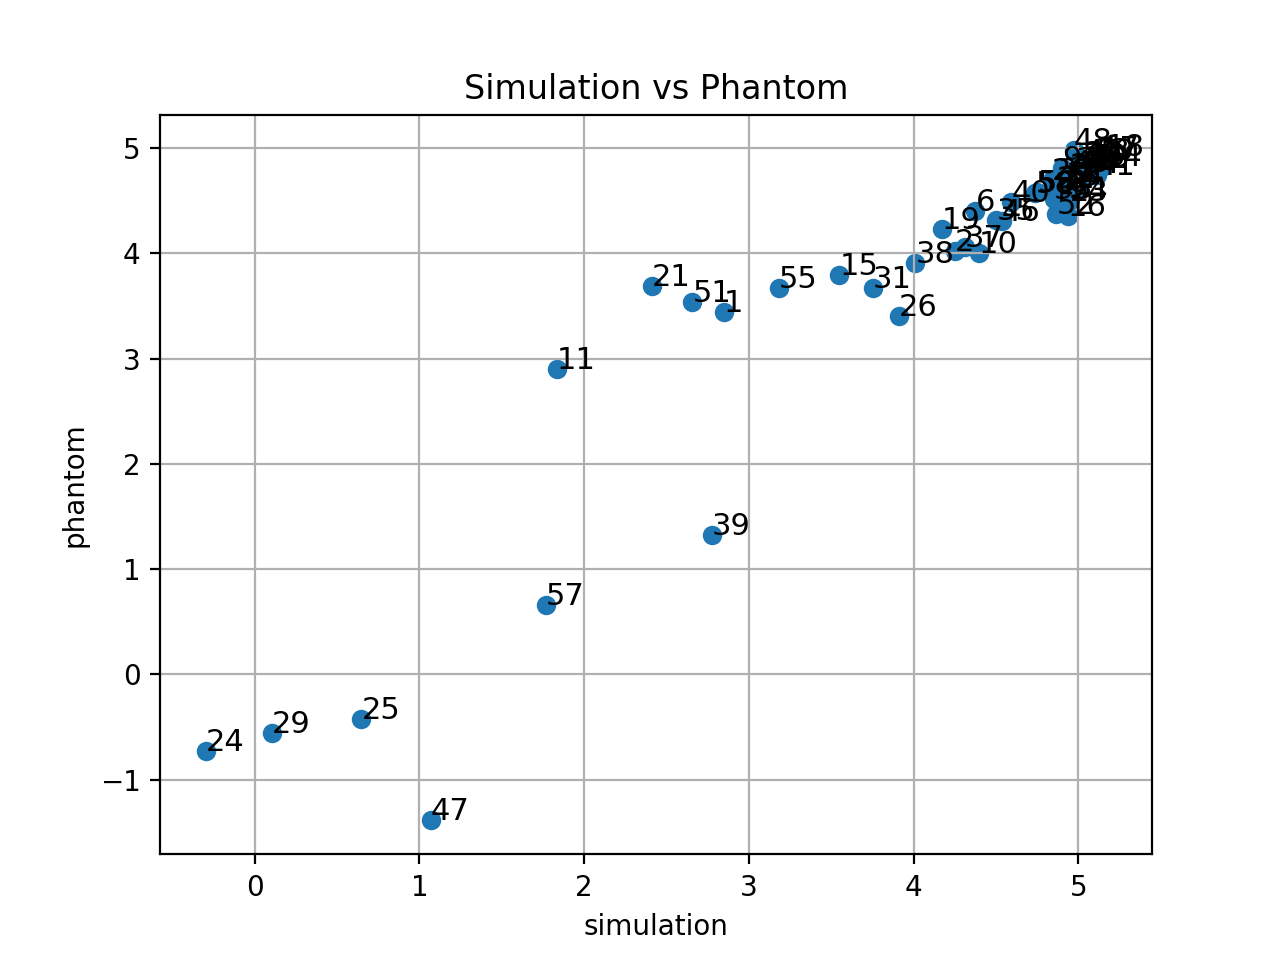

In [4]:
m = 1 # m=1 is CNR

is_labeling_points = True

x = speckle_stats_dnn_cyst[:, m, :].mean(axis=-1)
y = speckle_stats_dnn_phantom[:, m, :].mean(axis=-1)
fig, ax = plt.subplots()
ax.scatter(x, y)

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(x))):
        ax.annotate(annotation, (x[i], y[i]), size=11)


ax.grid()
ax.set_title('Simulation vs Phantom')
ax.set_xlabel('simulation')
ax.set_ylabel('phantom')
plt.show()

# CNR: Simulation vs In vivo

<IPython.core.display.Javascript object>


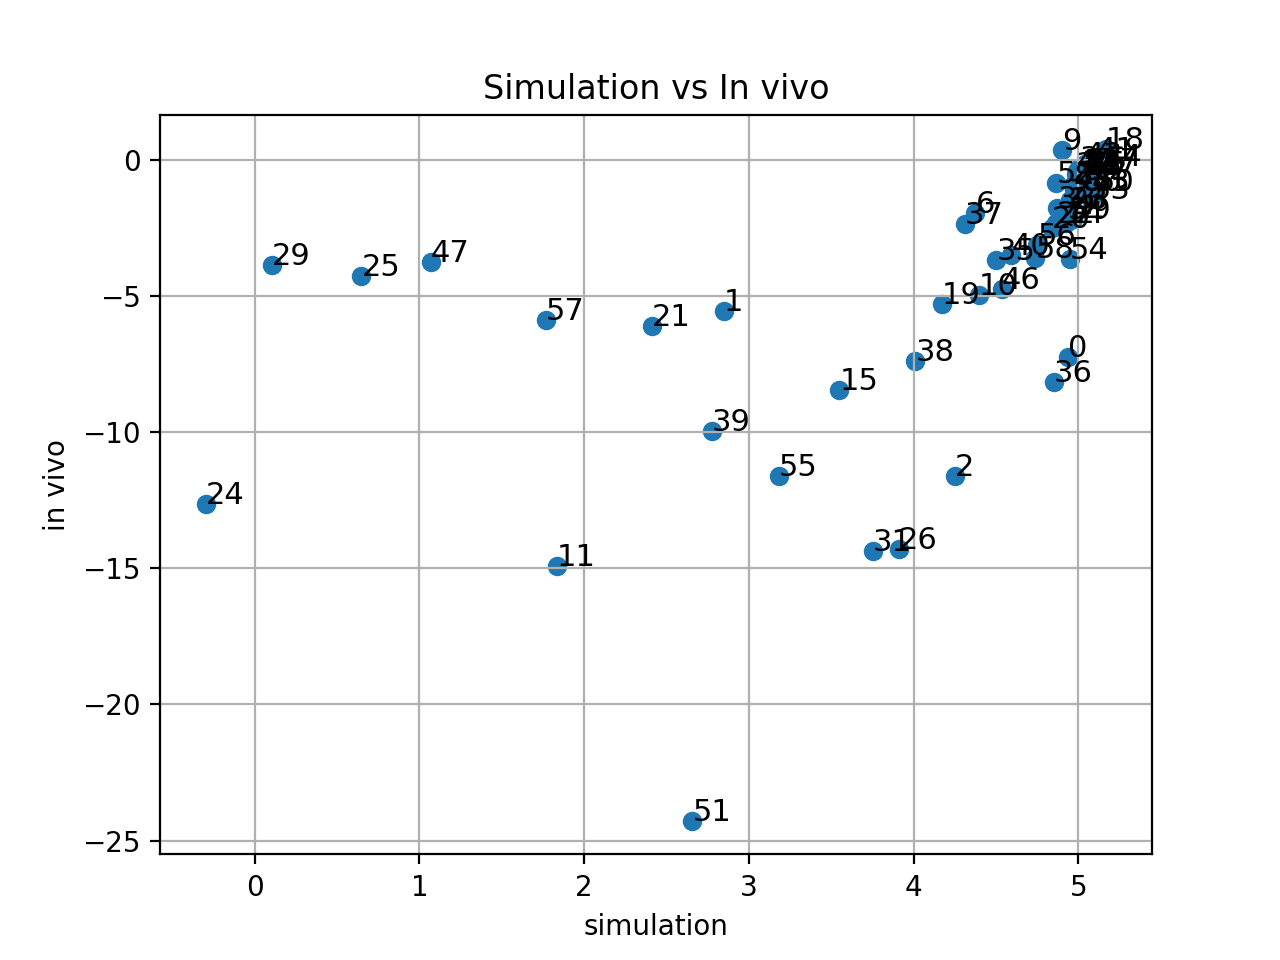

In [5]:
# Simulation vs In vivo

fig, ax = plt.subplots()
x = speckle_stats_dnn_cyst[:, m, :].mean(axis=-1)
y = speckle_stats_dnn_in_vivo[:, m, :].mean(axis=-1)

ax.scatter(x, y)

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(x))):
        ax.annotate(annotation, (x[i],y[i]), size=11)
    
    
ax.grid()
ax.set_title('Simulation vs In vivo')
ax.set_xlabel('simulation')
ax.set_ylabel('in vivo')
plt.show()

# Phantom vs In vivo

<IPython.core.display.Javascript object>


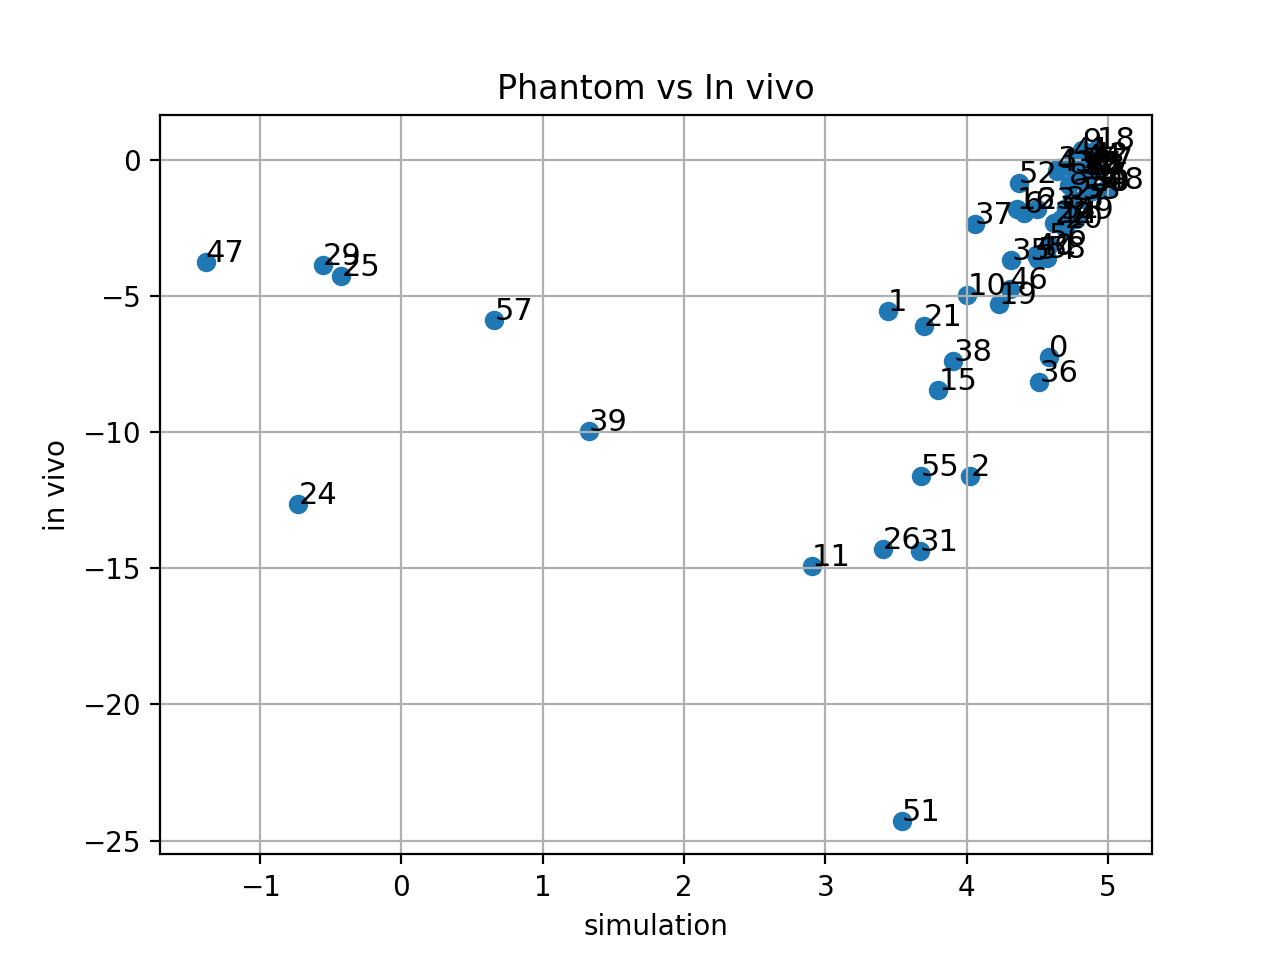

In [6]:
# # Simulation vs In vivo

fig, ax = plt.subplots()

x = speckle_stats_dnn_phantom[:, m, :].mean(axis=-1)
y = speckle_stats_dnn_in_vivo[:, m, :].mean(axis=-1)

ax.scatter(x, y)

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(x))):
        ax.annotate(annotation, (x[i],y[i]), size=11)
    
    

ax.grid()
ax.set_title('Phantom vs In vivo')
ax.set_xlabel('simulation')
ax.set_ylabel('in vivo')
plt.show()

# CNR vs Hyperparams

In [7]:
# # Simulated Cyst CNR vs Model Params

hyperparams = [ \
#  'batch_size',
 'conv1_dropout',
 'conv2_dropout',
 'fcs_dropout',
 'conv1_kernel_size',
 'conv1_num_kernels',
#  'conv1_stride',
 'conv2_kernel_size',
 'conv2_num_kernels',
#  'conv2_stride',
#  'data_is_target',
 'data_noise_gaussian',
 'data_train',
 'data_val',
 'fcs_hidden_size',
 'fcs_num_hidden_layers',
#  'k',
#  'patience',
 'pool1_kernel_size',
 'pool1_stride',
 'pool2_kernel_size',
#  'pool2_stride',
#  'save_initial',
#  'weight_decay',
 'loss_val_k_3',
 'loss_val_k_4',
 'loss_val_k_5',
]



# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

mean_cnr_cyst = speckle_stats_dnn_cyst[:, 1, :].mean(axis=-1)
df['mean_cnr_cyst'] = mean_cnr_cyst

mean_cnr_phantom = speckle_stats_dnn_phantom[:, 1, :].mean(axis=-1)
df['mean_cnr_phantom'] = mean_cnr_phantom

mean_cnr_in_vivo = speckle_stats_dnn_in_vivo[:, 1, :].mean(axis=-1)
df['mean_cnr_in_vivo'] = mean_cnr_in_vivo


In [9]:
max_cnr = df['mean_cnr_cyst'].idxmax()
print(max_cnr)
max_row = df[max_cnr:max_cnr+1]
max_row.index = [0]

18


In [10]:
def plot_cnr_hyperparameters(df, column_of_interest, ylim=(0, 6), plot_method='scatter'):
    number_of_subplots = len(hyperparams)
    ncols = 4
    nrows = number_of_subplots // ncols 
    nrows += number_of_subplots % ncols

    # Create a Position index
    position = range(1, number_of_subplots + 1)

    fig = plt.figure(1, figsize=(20, 40))

    for i, column in enumerate(df[hyperparams]):
        ax = fig.add_subplot(nrows, ncols, position[i])
        if plot_method == 'scatter':
            ax.scatter(df_dropout[column], df[column_of_interest], color='blue')
#             ax.scatter(df_no_dropout[column], df_no_dropout[column_of_interest], color='red')
        else:
            possible_column_values = df_dropout_and_no_dropout[column].unique()
            print('df_dropout[%s] =' % column, df_dropout[column])
            print('df_no_dropout[%s] =' % column, df_no_dropout[column])
#             ax.bar(['with dropout', 'without dropout'], [df_dropout[column][0], df_no_dropout[column][0]])
            ax.bar(possible_column_values, )
        ax.set_ylabel('cnr')
        ax.set_xlabel(column)
        if ylim: ax.set_ylim(*ylim)

    plt.show()

# Picking High CNR, Low Speckle SNR Models - Simulation

<IPython.core.display.Javascript object>


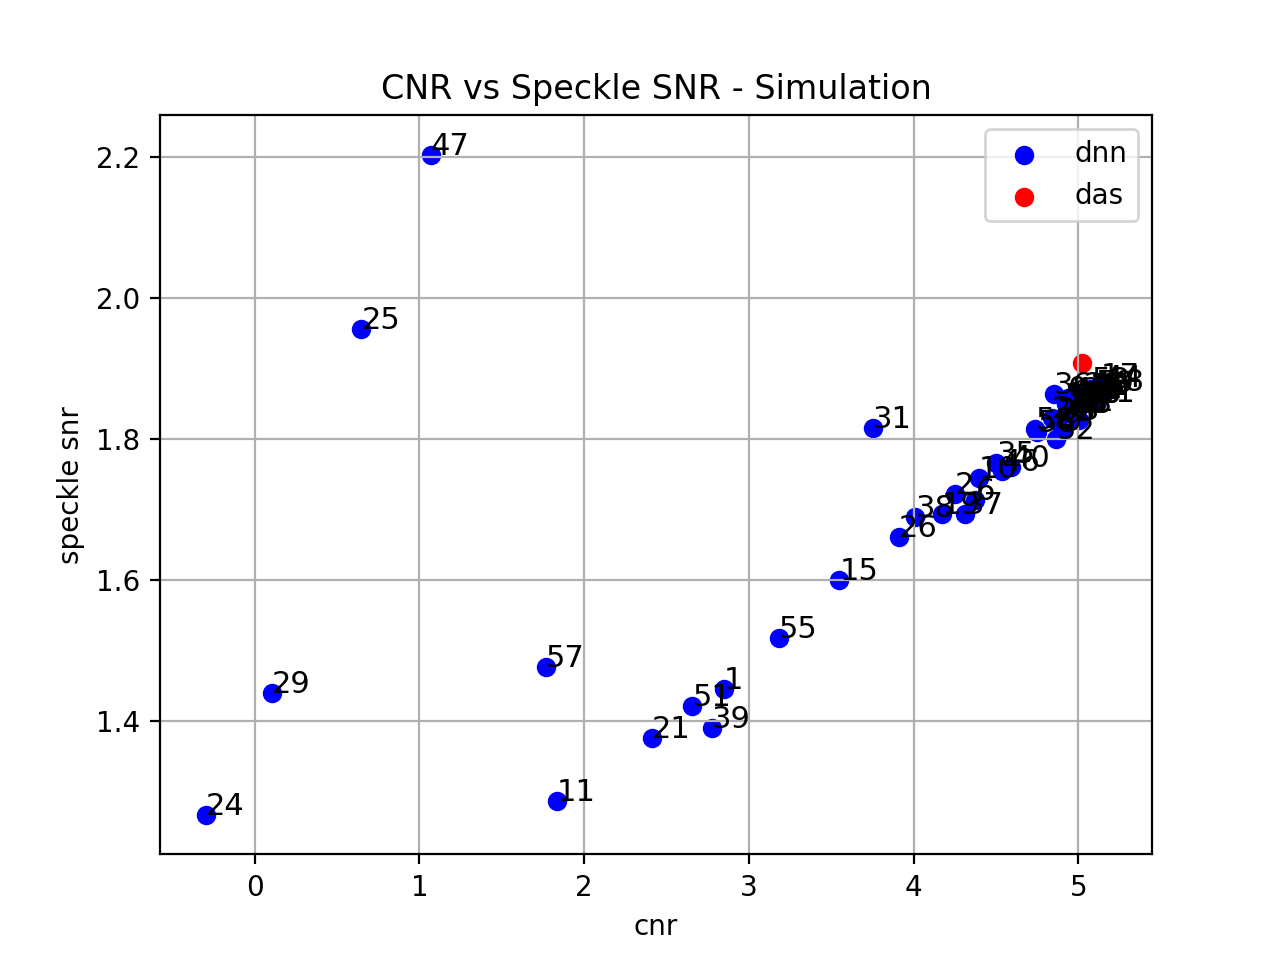

In [11]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_simulation = mean([5.09, 4.9138, 5.148, 4.8877, 5.0831])
das_avg_speckle_snr_simulation = mean([1.9281, 1.8777, 1.9231, 1.8922, 1.9186])

is_labeling_points = True

cnr_simulation = speckle_stats_dnn_cyst[:, cnr, :].mean(axis=-1)
speckle_snr_simulation = speckle_stats_dnn_cyst[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_simulation, speckle_snr_simulation, color='blue', label='dnn')
ax.scatter(das_avg_cnr_simulation, das_avg_speckle_snr_simulation, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_simulation))):
        ax.annotate(annotation, (cnr_simulation[i], speckle_snr_simulation[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - Simulation')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
# plt.xlim(4, 6)
# plt.ylim(4, 6)
plt.show()

# Picking High CNR, Low Speckle SNR Models - Phantom

<IPython.core.display.Javascript object>


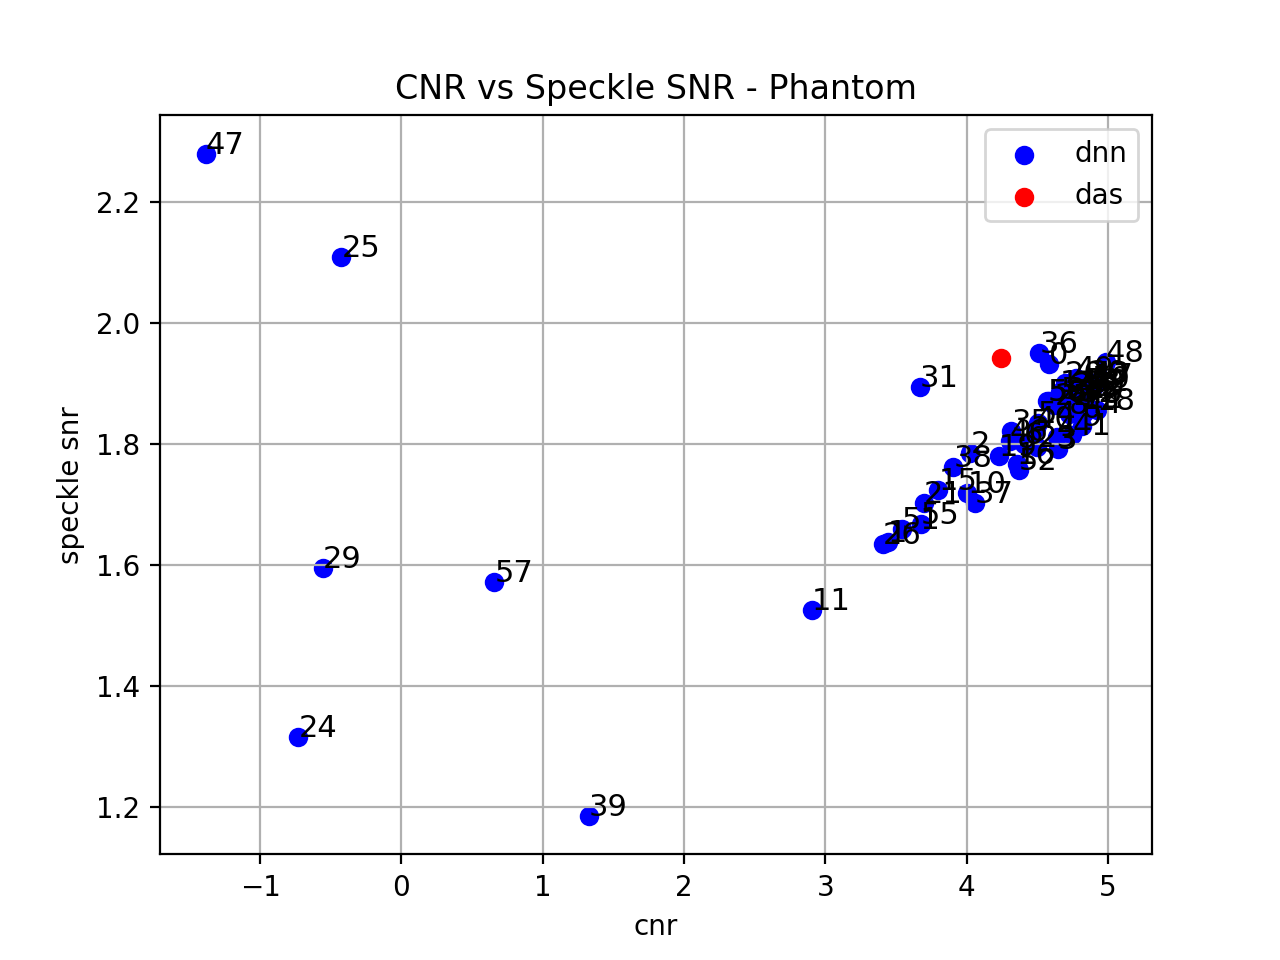

In [12]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_phantom = mean([4.3994, 3.7869, 4.5012, 4.7083, 3.804])
das_avg_speckle_snr_phantom = mean([1.9298, 1.8478, 1.9997, 2.0478, 1.8886])

is_labeling_points = True

cnr_simulation = speckle_stats_dnn_phantom[:, cnr, :].mean(axis=-1)
speckle_snr_simulation = speckle_stats_dnn_phantom[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_simulation, speckle_snr_simulation, color='blue', label='dnn')
ax.scatter(das_avg_cnr_phantom, das_avg_speckle_snr_phantom, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_simulation))):
        ax.annotate(annotation, (cnr_simulation[i], speckle_snr_simulation[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - Phantom')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
# plt.xlim(4, 6)
# plt.ylim(4, 6)
plt.show()

# Picking High CNR, Low Speckle SNR Models - In Vivo

<IPython.core.display.Javascript object>


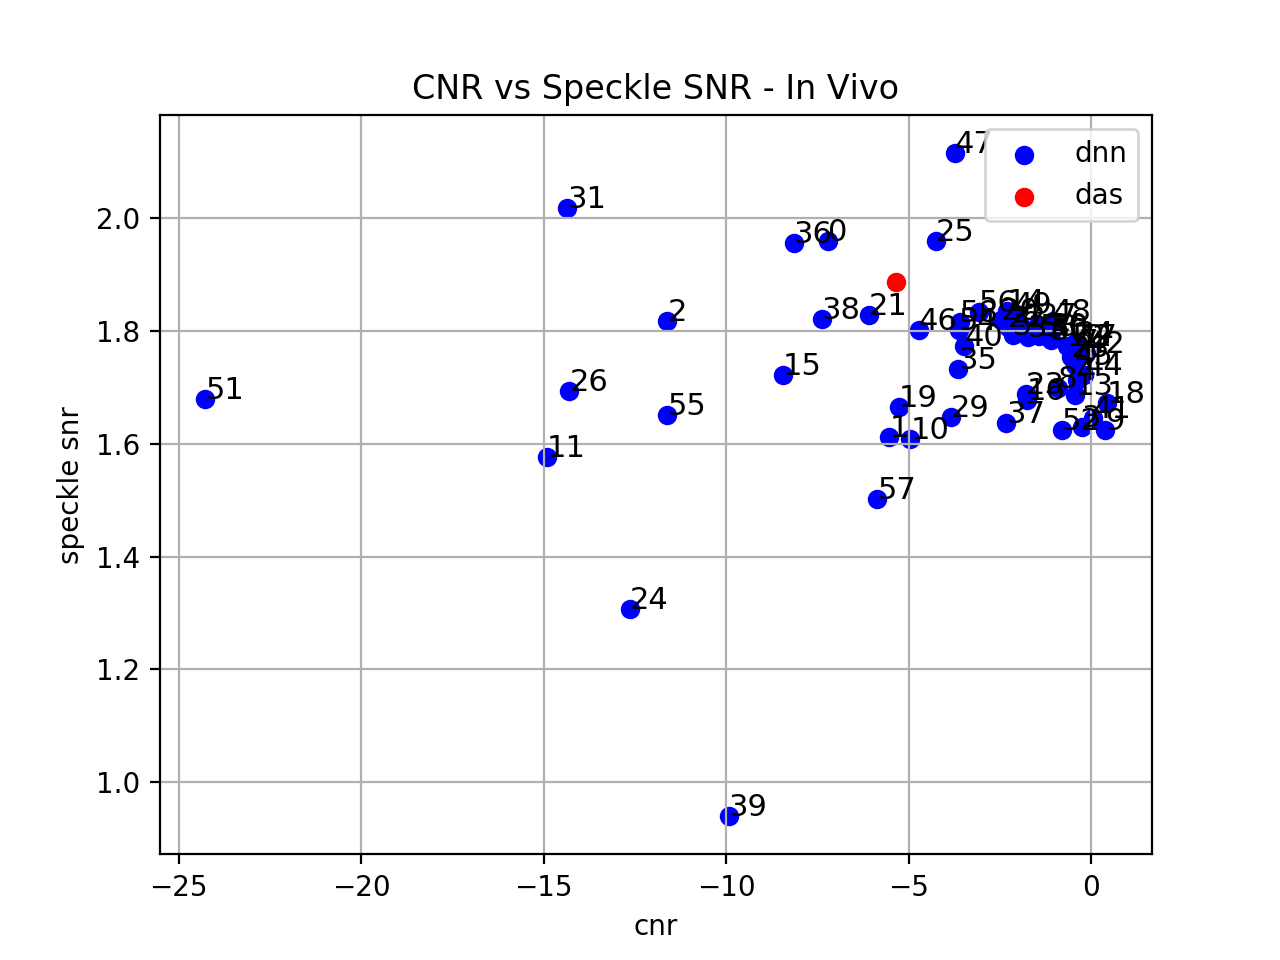

In [13]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_in_vivo = mean([-14.982, 4.2585])
das_avg_speckle_snr_in_vivo = mean([1.8672, 1.9078])

is_labeling_points = True

cnr_simulation = speckle_stats_dnn_in_vivo[:, cnr, :].mean(axis=-1)
speckle_snr_simulation = speckle_stats_dnn_in_vivo[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_simulation, speckle_snr_simulation, color='blue', label='dnn')
ax.scatter(das_avg_cnr_in_vivo, das_avg_speckle_snr_in_vivo, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_simulation))):
        ax.annotate(annotation, (cnr_simulation[i], speckle_snr_simulation[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - In Vivo')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
# plt.xlim(4, 6)
# plt.ylim(4, 6)
plt.show()

# Picking Models With Better CNR, Lower Speckle SNR than DAS

# Simulation CNR as a Function of Hyperparameters

<IPython.core.display.Javascript object>


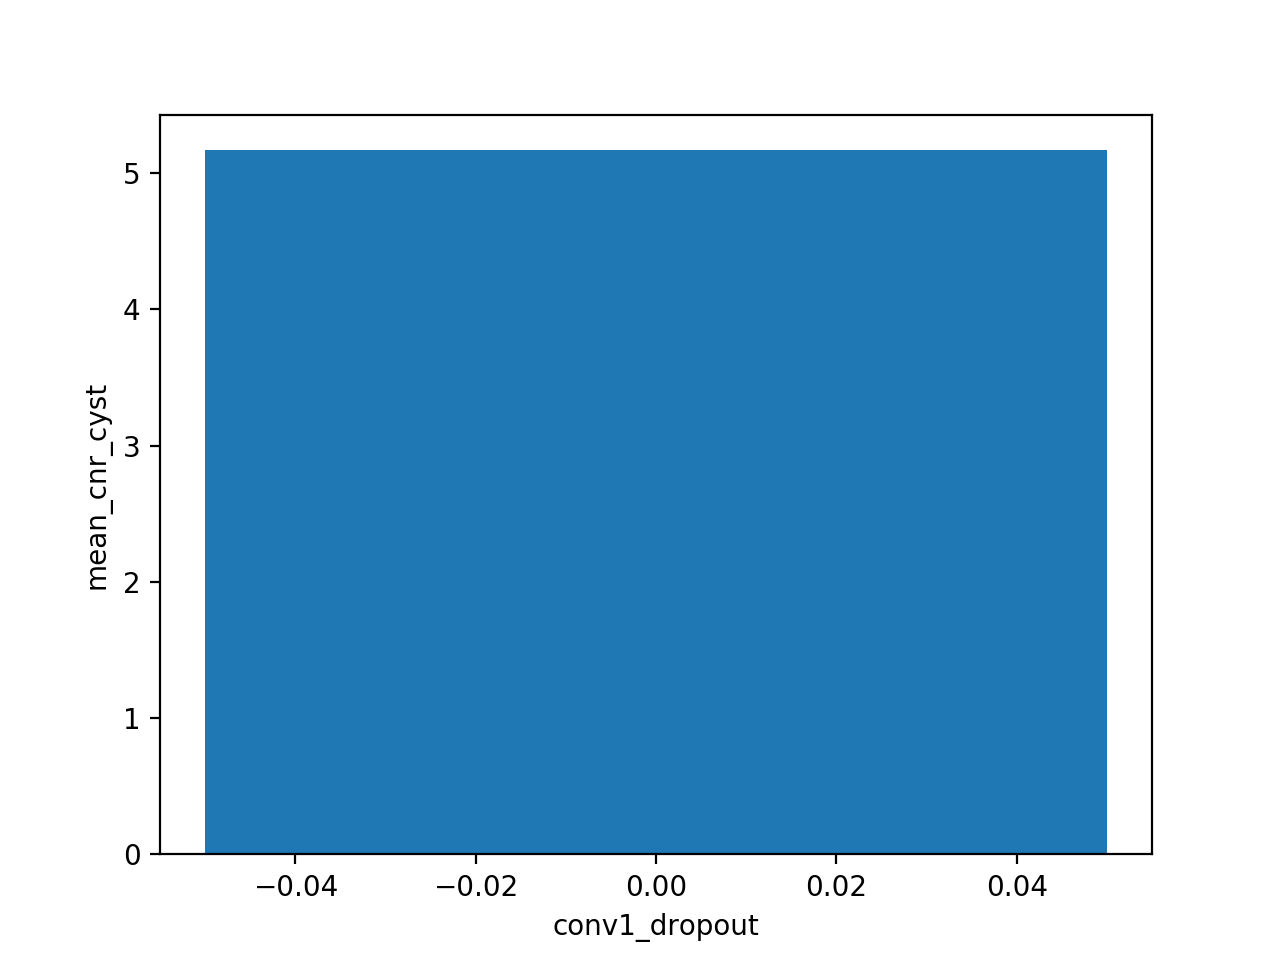

<IPython.core.display.Javascript object>


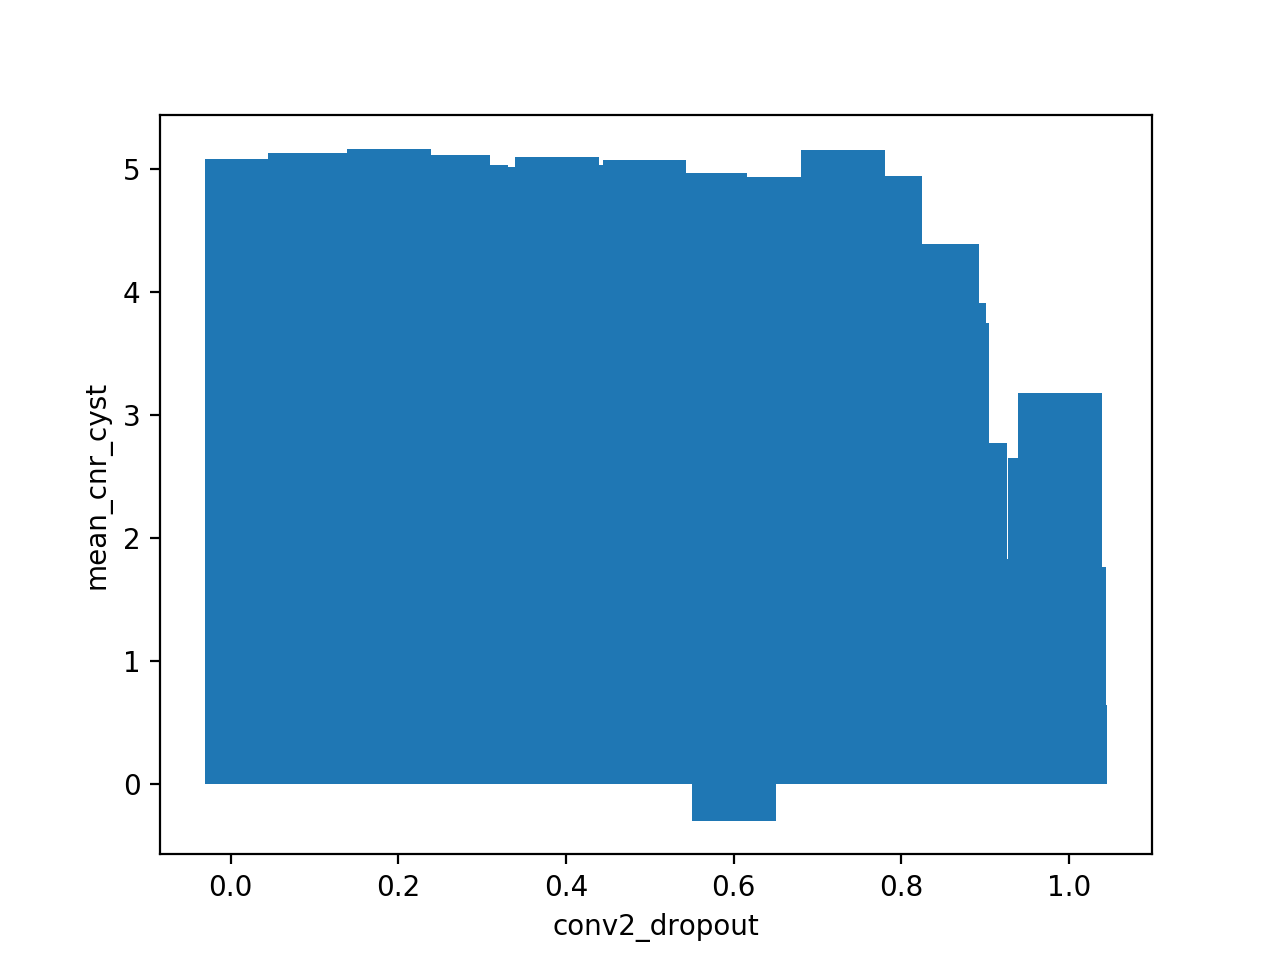

<IPython.core.display.Javascript object>


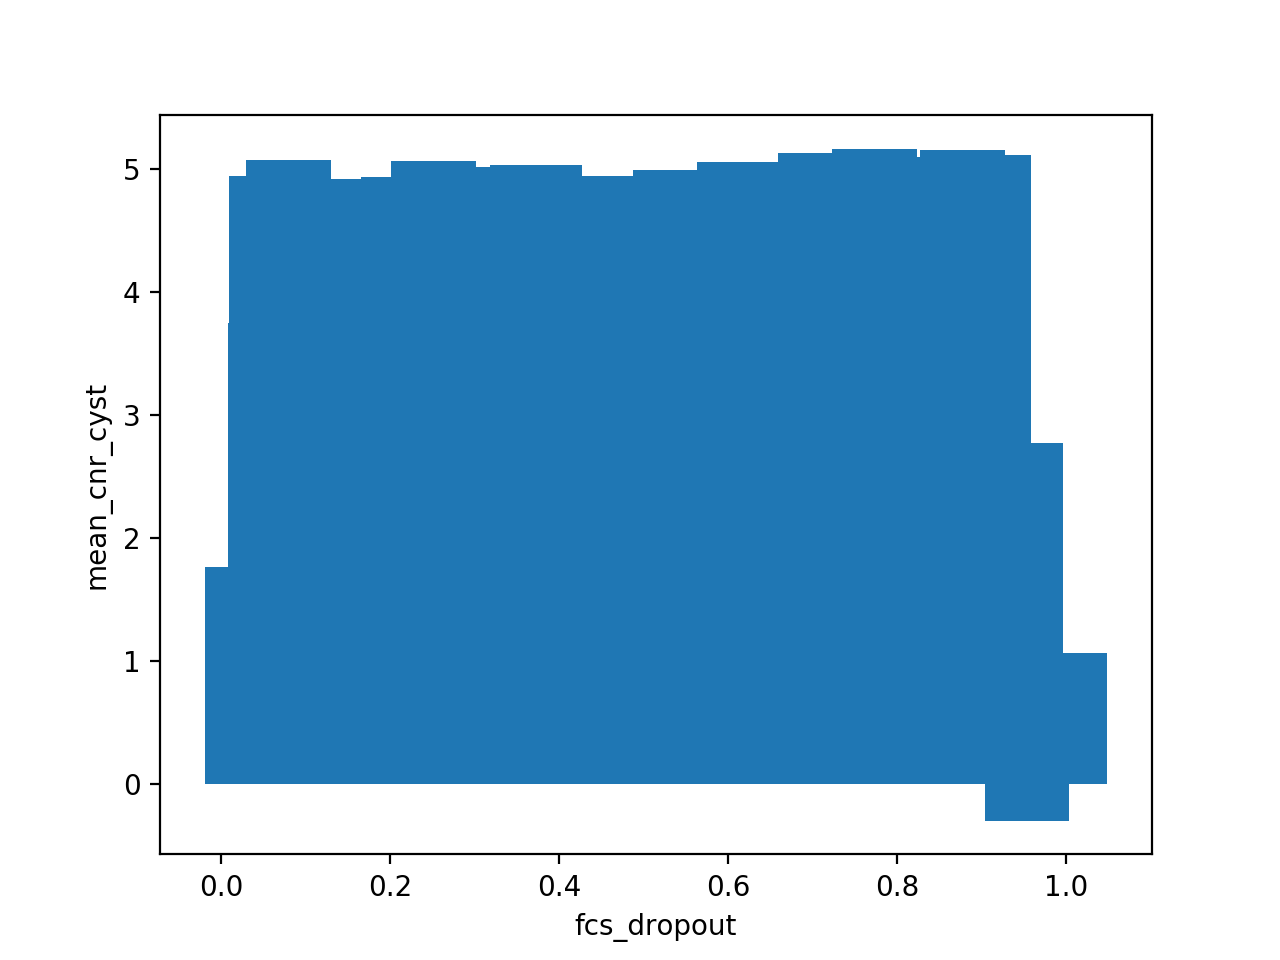

<IPython.core.display.Javascript object>


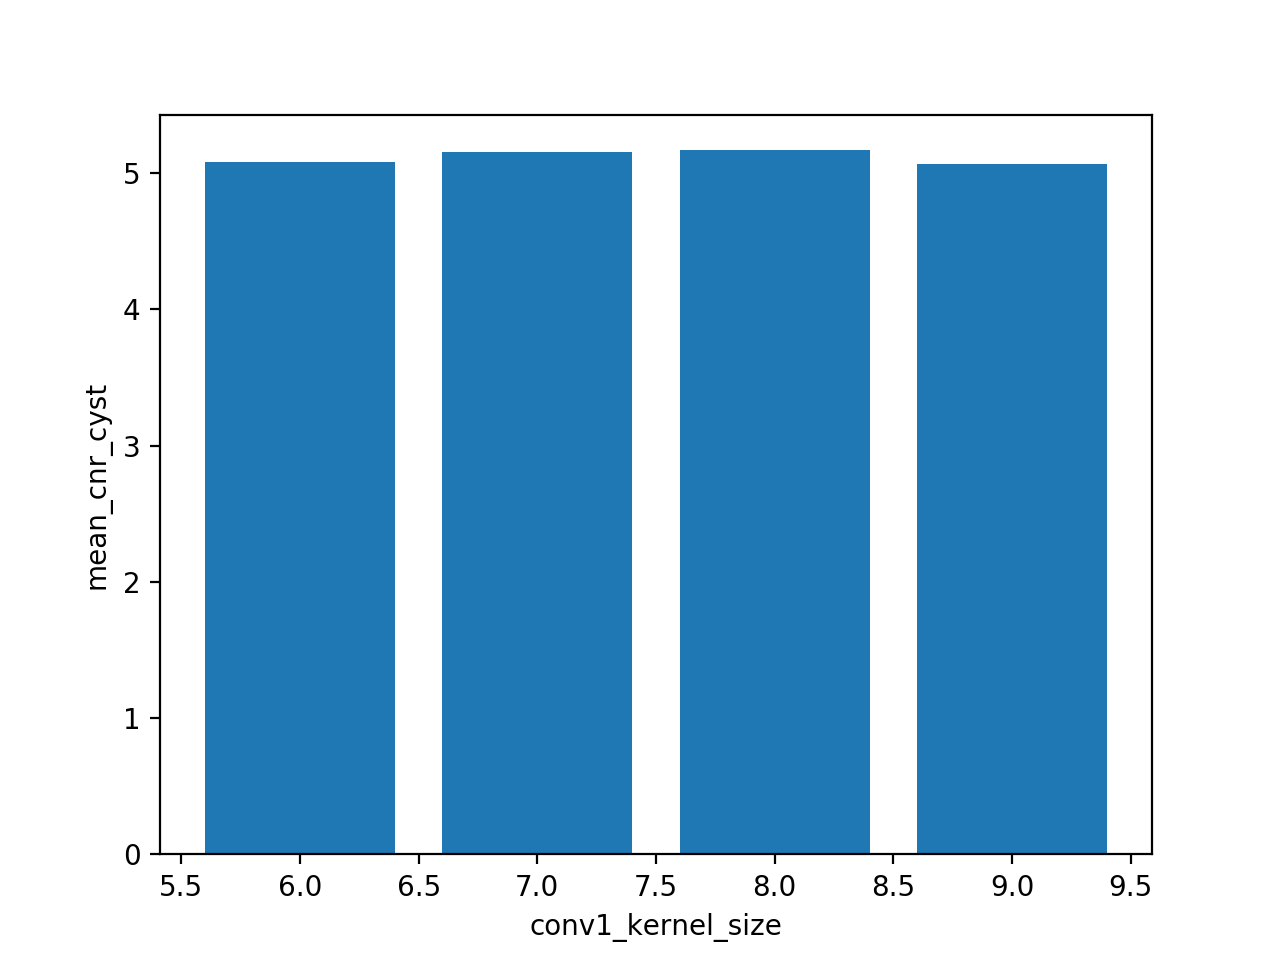

<IPython.core.display.Javascript object>


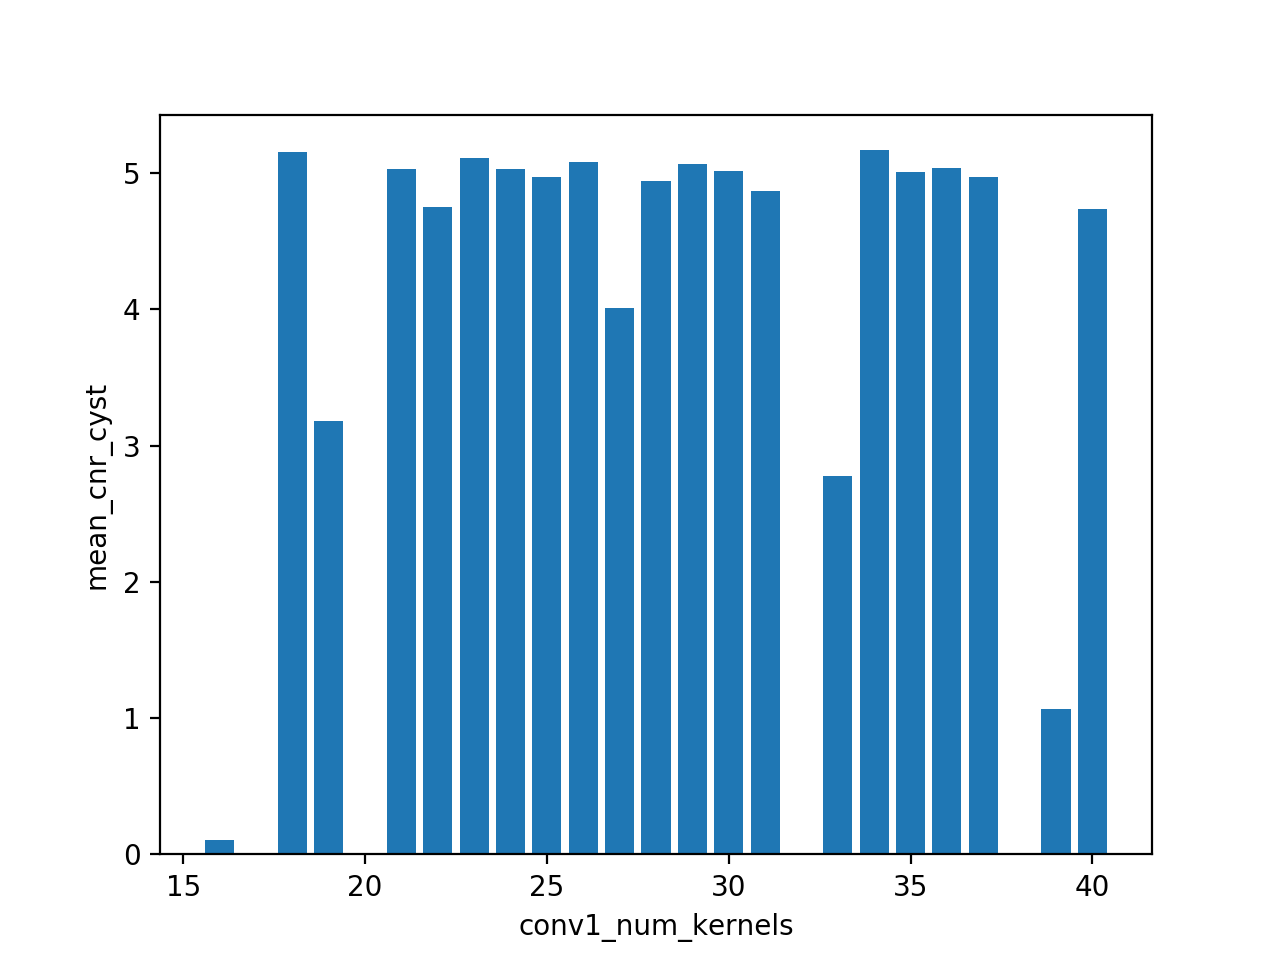

<IPython.core.display.Javascript object>


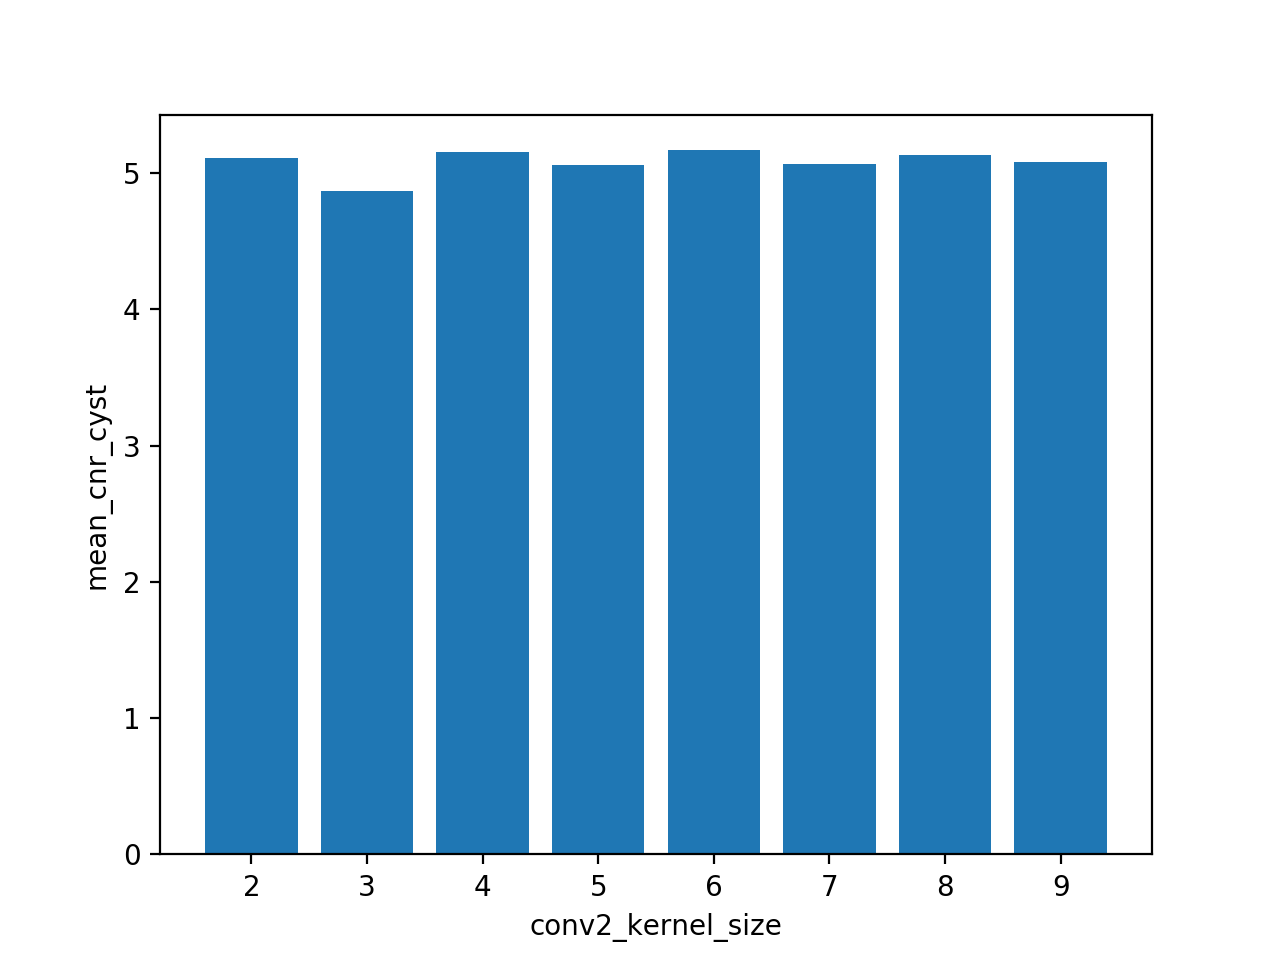

<IPython.core.display.Javascript object>


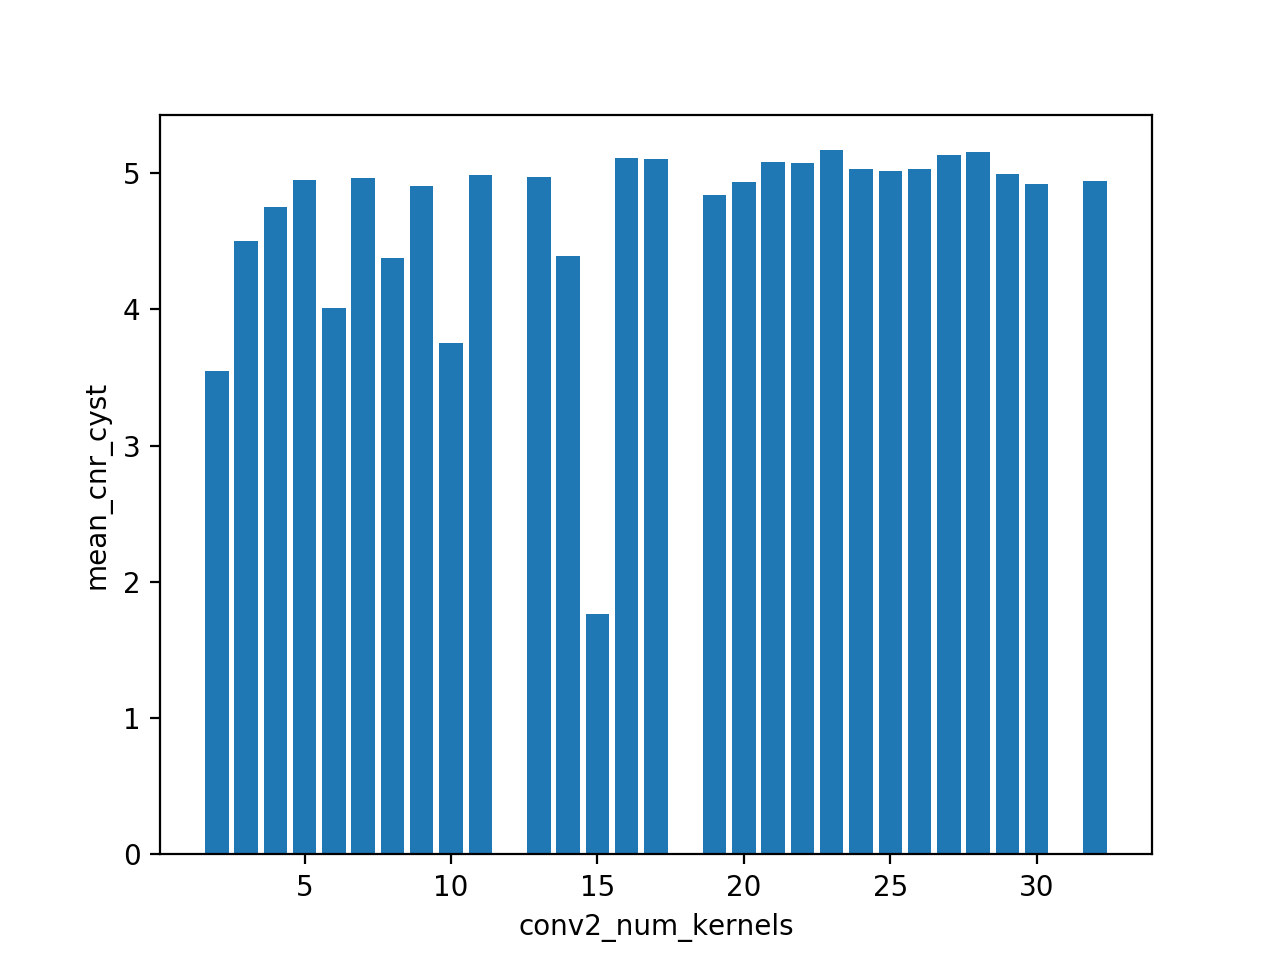

<IPython.core.display.Javascript object>


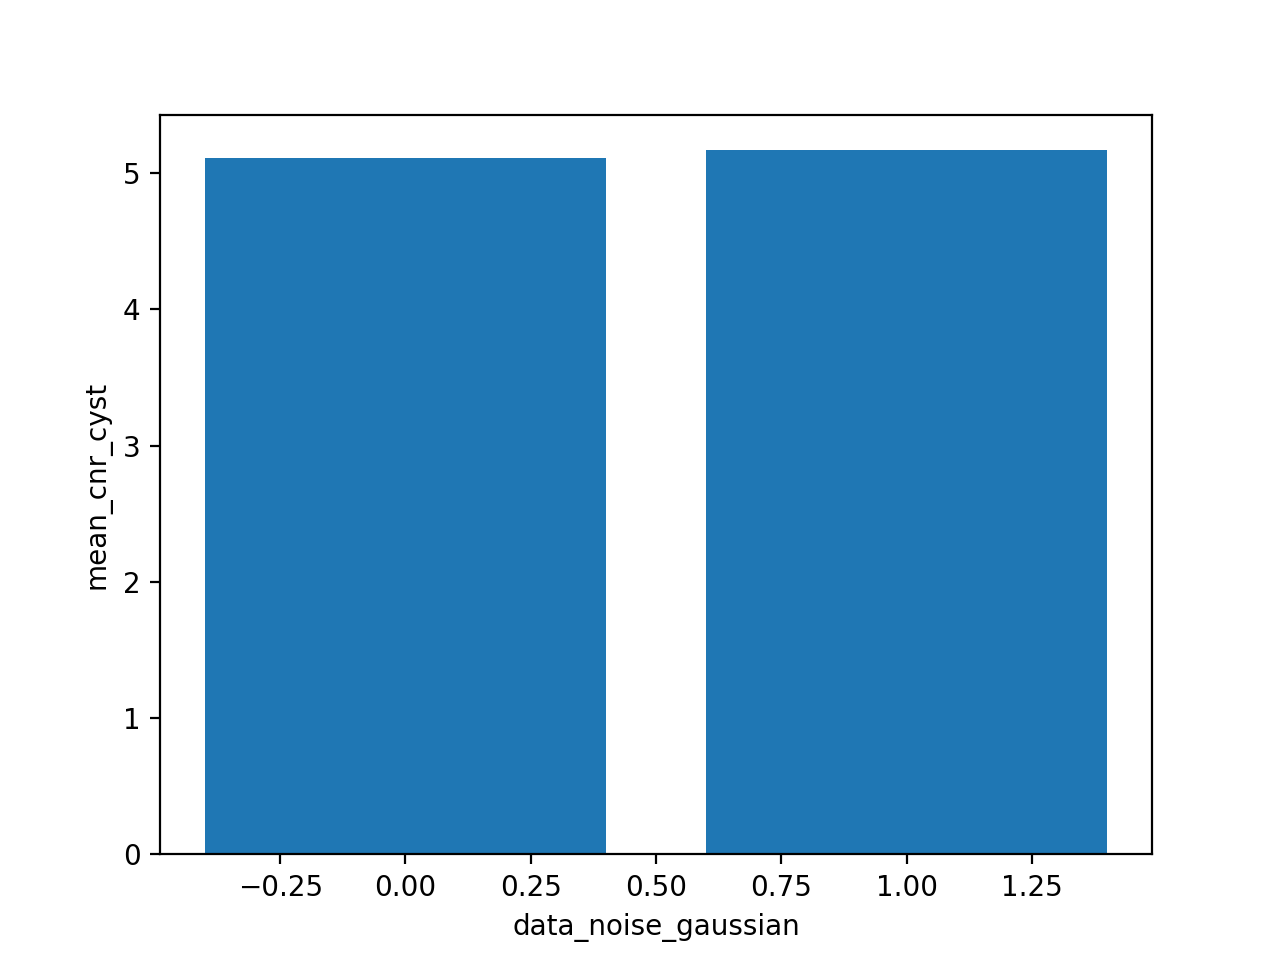

<IPython.core.display.Javascript object>


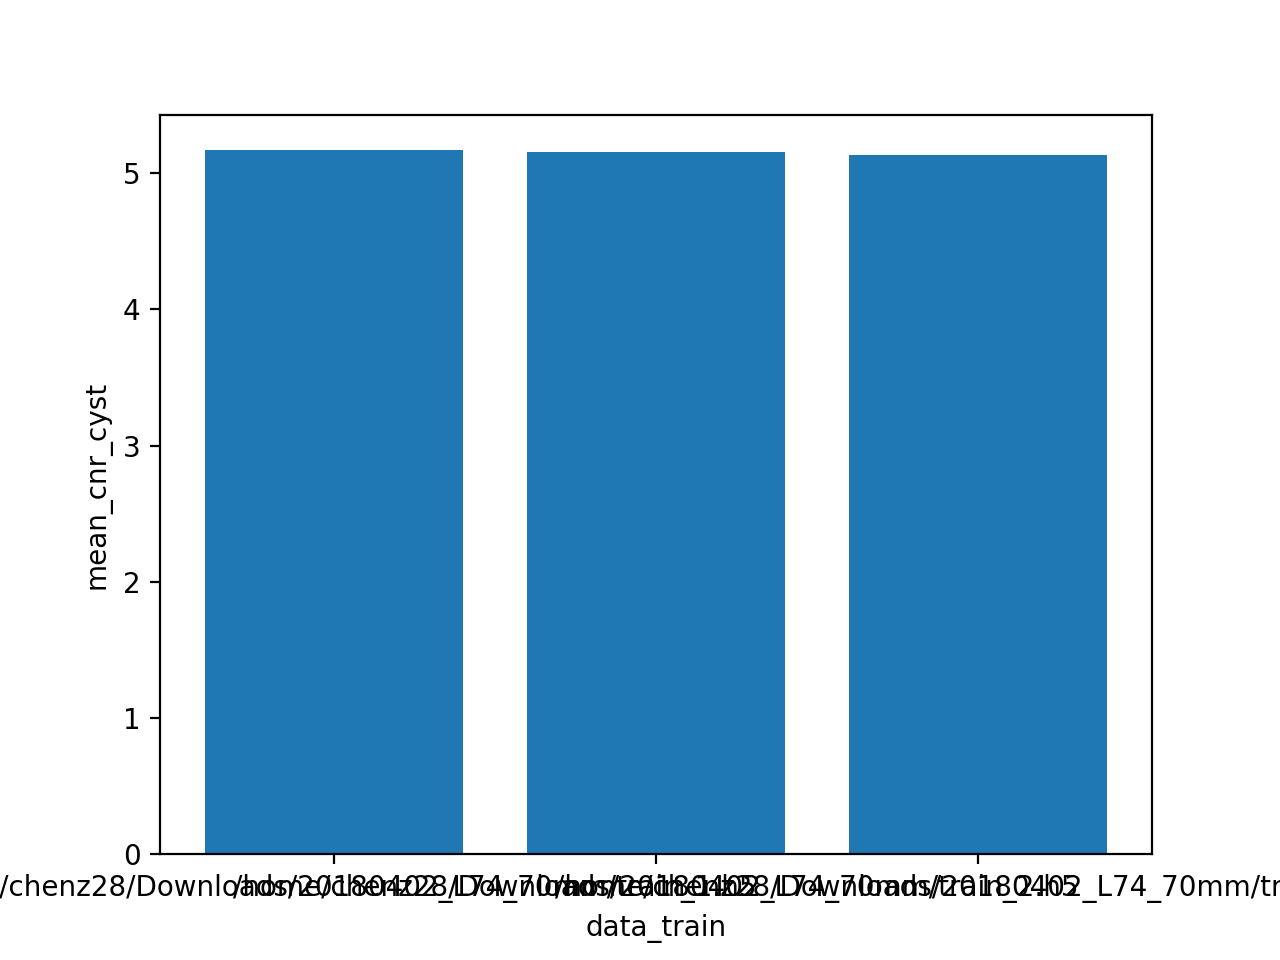

<IPython.core.display.Javascript object>


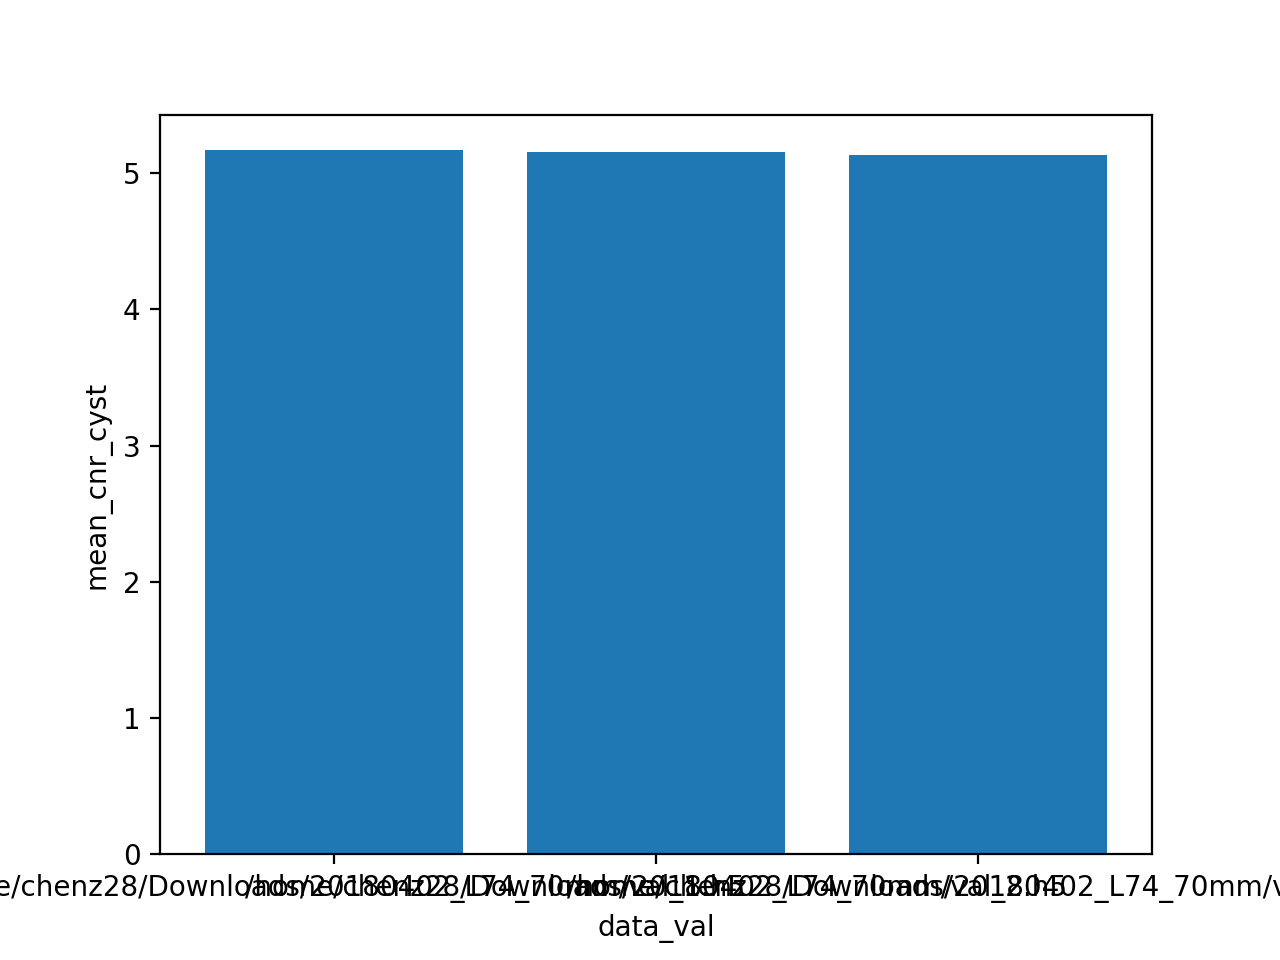

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


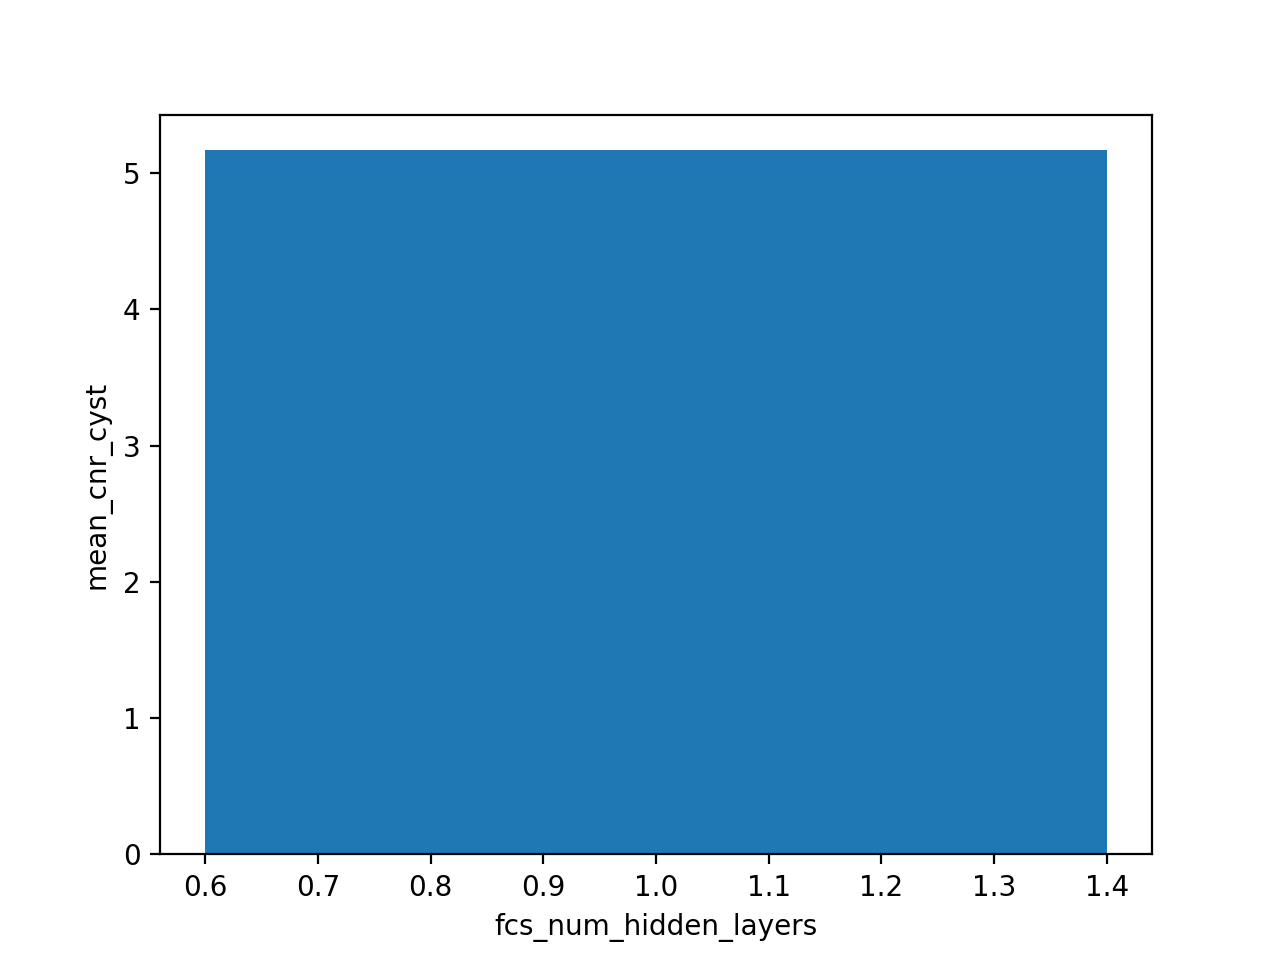

<IPython.core.display.Javascript object>


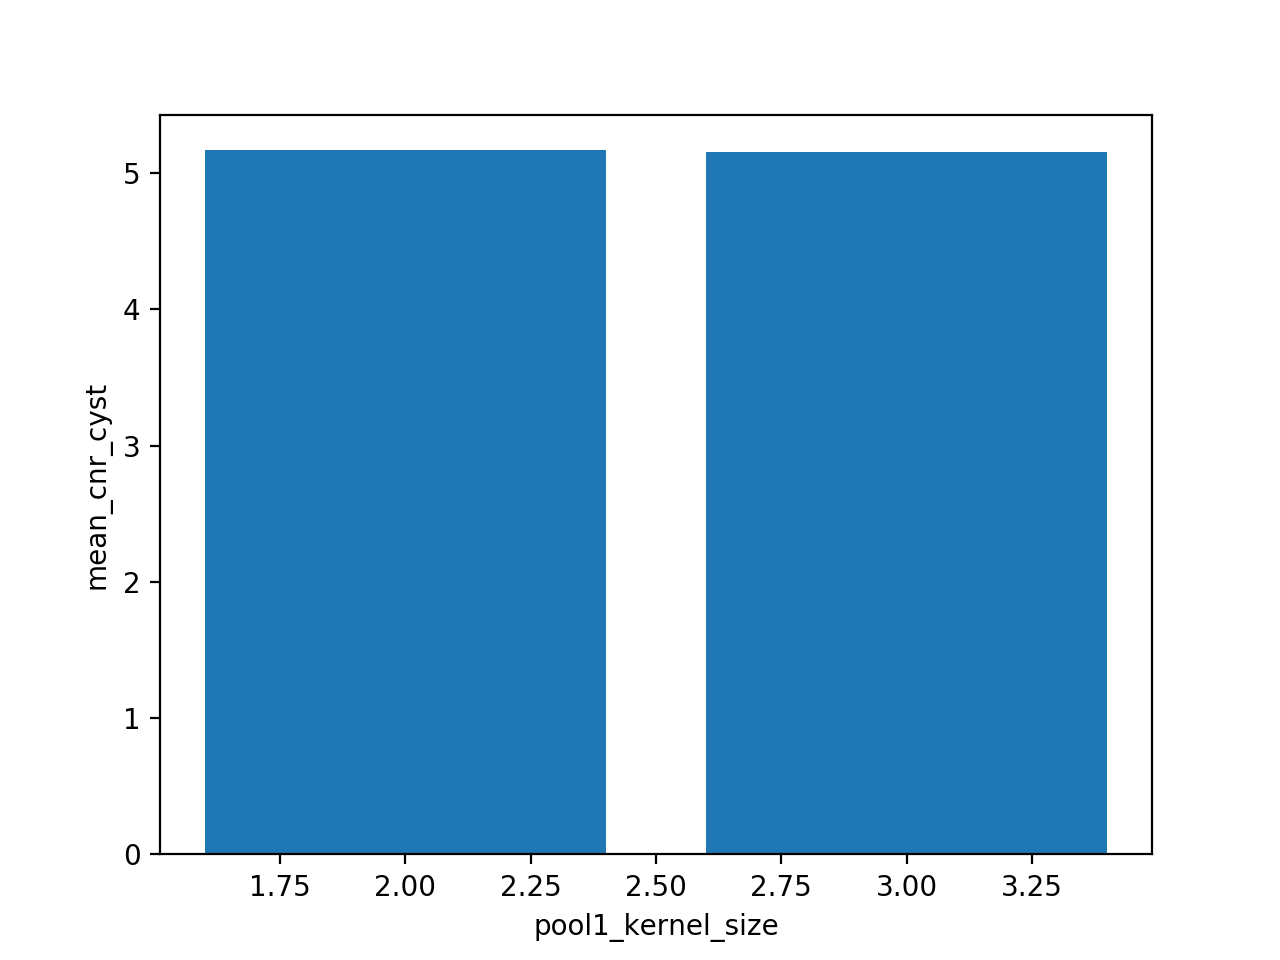

<IPython.core.display.Javascript object>

/Users/zhanwenchen/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


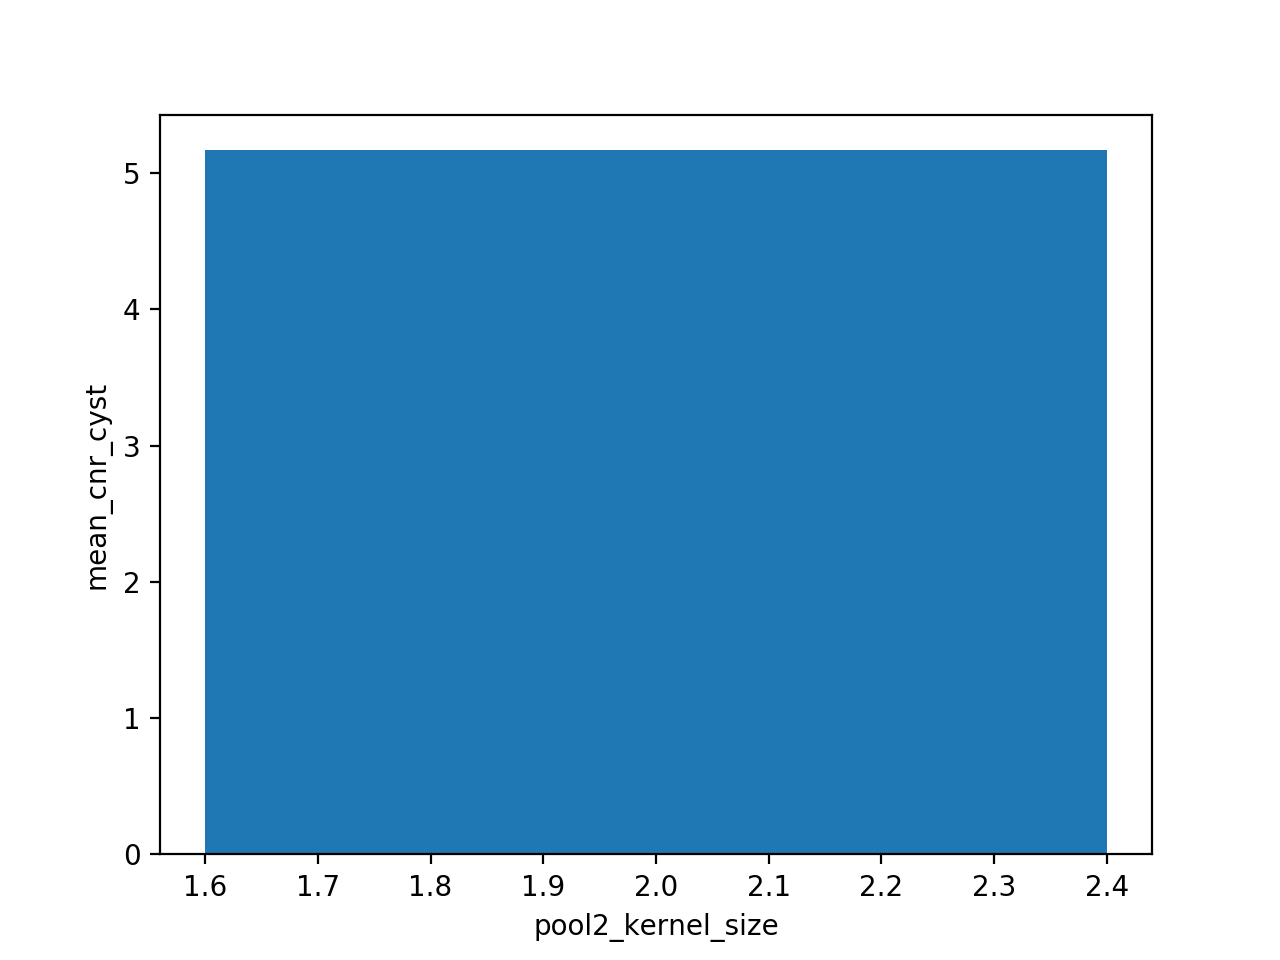

<IPython.core.display.Javascript object>


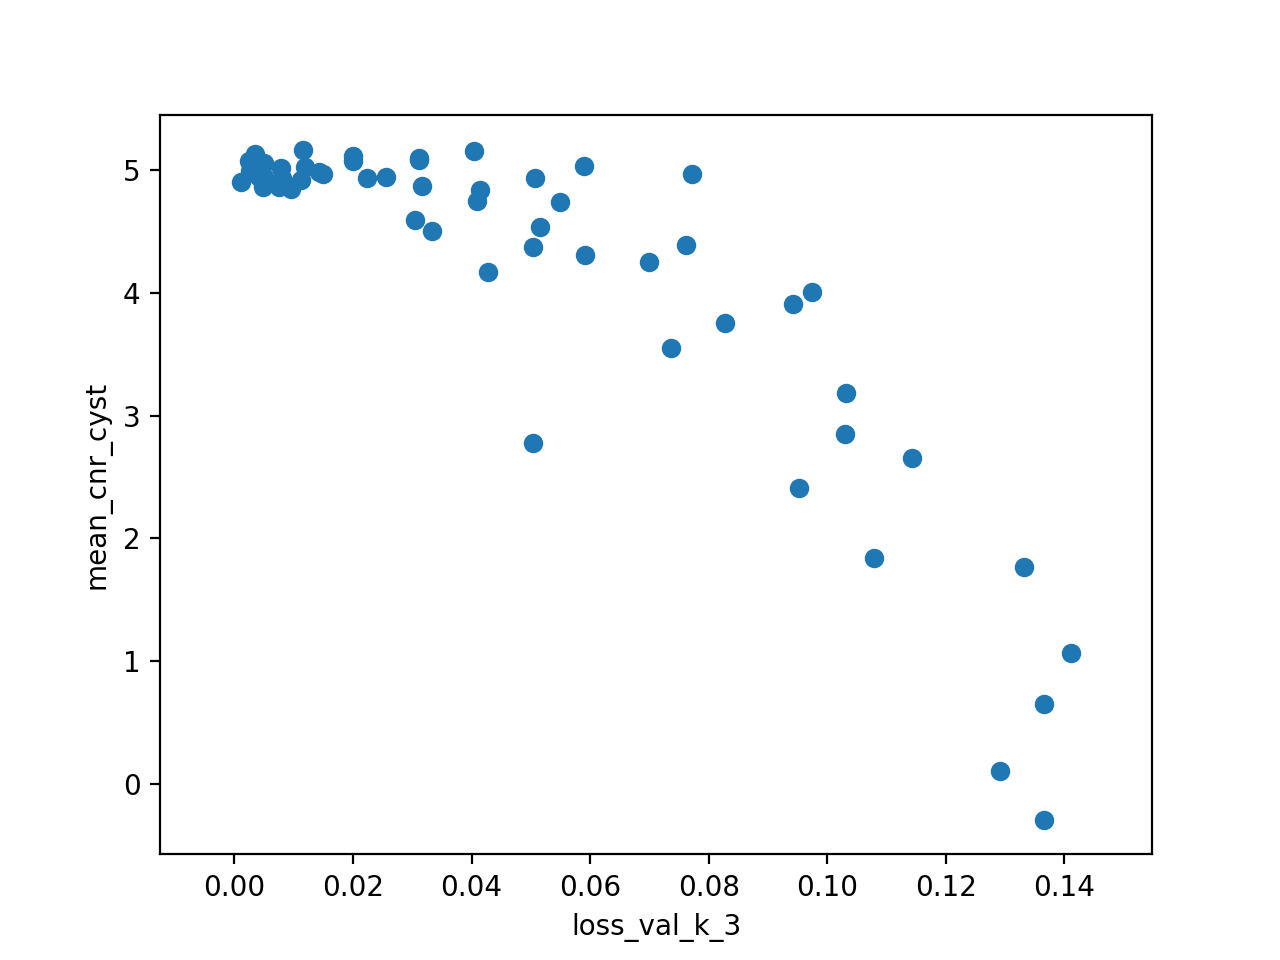

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import pandas as pd

# NOTE: for each hyperparameter that is discrete, the y value (e.g. 'mean_cyst_cnr') 
# is the best given an x value (hyperparam, e.g. 'conv1_kernel_size'). However,
# for continuous values such as loss, there's no way of tallying the cnr given the
# same exact loss because there are no same exact losses.
def plot_merged_cnr_hyperparameters(df, y_column, hyperparams_of_interest, ylim=(5,6)):
    # TODO: 2. ylim
    # TODO: 3. resize x bar widths
    df.reset_index(inplace=True, drop=True)

    for hyperparam in hyperparams_of_interest:
        # for each unique value of "dropout", find the max for "mean_cnr_cyst"
        df_max = df.groupby(hyperparam).idxmax()
        df_max['type'] = 'max'

        df2 = df_max.set_index('type',append=True).stack().rename('index')

        df3 = pd.concat([ df2.reset_index().drop(hyperparam,axis=1).set_index('index'), 
                          df.loc[df2.values] ], axis=1 )
        df4 = df3.set_index([hyperparam,'level_2']).sort_index()[y_column]
        df5 = df4.loc[(df4.index.get_level_values('level_2') == y_column)].to_frame()
        df5 = df5.reset_index().drop('level_2', axis=1)
        
        plt.figure()
        # TODO: redo this for generalization
        if hyperparam.startswith('loss_val_k'):
#             plt.bar(df5[hyperparam], width, df5[y_column])
#             plt.hist(df5[hyperparam], histtype='bar', label=[str(x) for x in popup_values])
            plt.scatter(df5[hyperparam], df5[y_column])
        elif hyperparam in ['conv1_dropout', 'conv2_dropout', 'fcs_dropout']:
            width = 0.1
            plt.bar(df5[hyperparam], df5[y_column], width)
        else:
            plt.bar(df5[hyperparam], df5[y_column])
        plt.xlabel(hyperparam)
        plt.ylabel(y_column)
        if ylim: plt.ylim(*ylim)
    
plot_merged_cnr_hyperparameters(df, 'mean_cnr_cyst', hyperparams, ylim=None)

# Phantom CNR as a Function of Hyperparameters

/Users/zhanwenchen/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


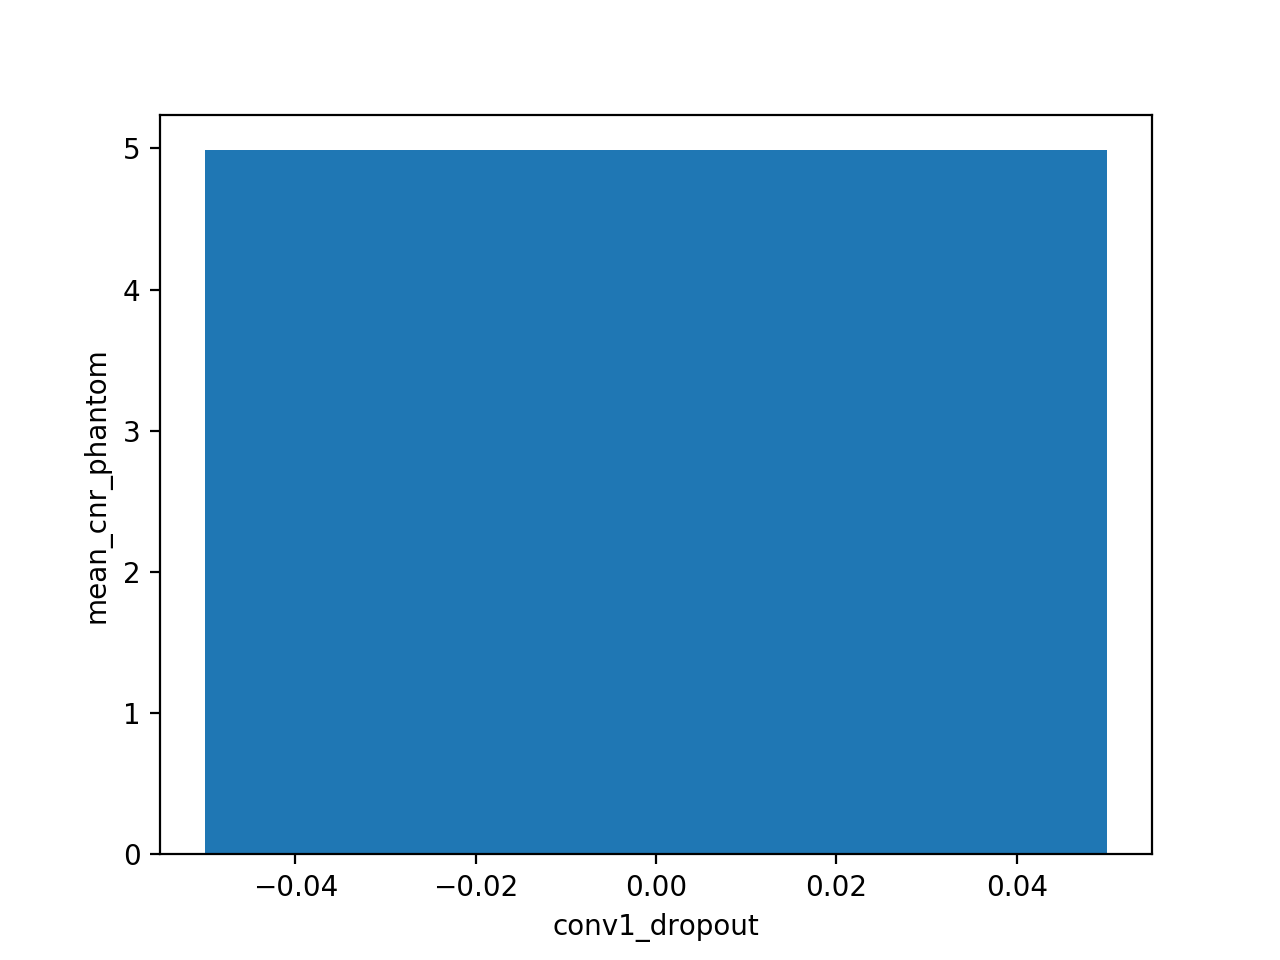

<IPython.core.display.Javascript object>


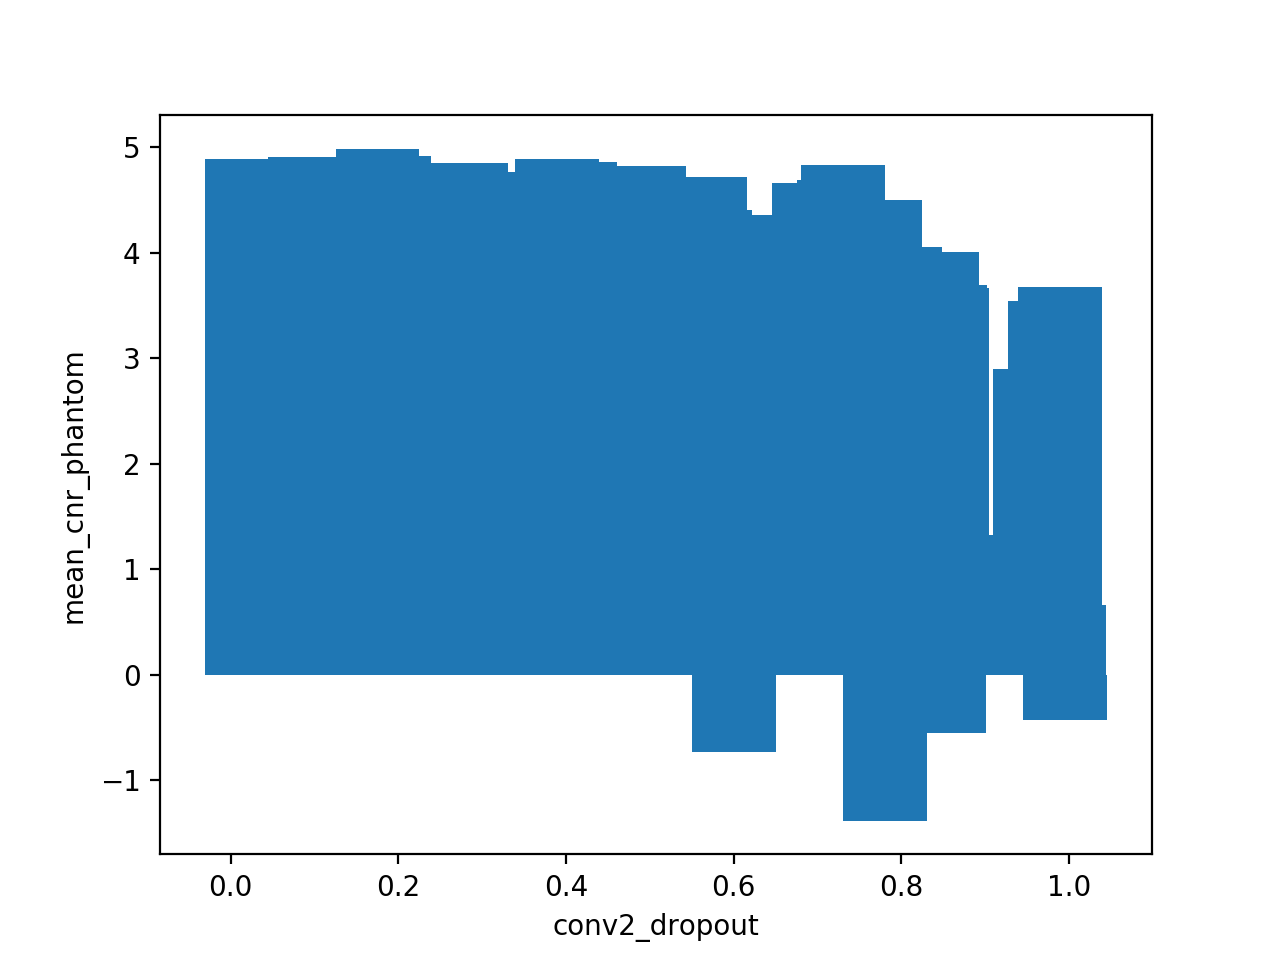

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


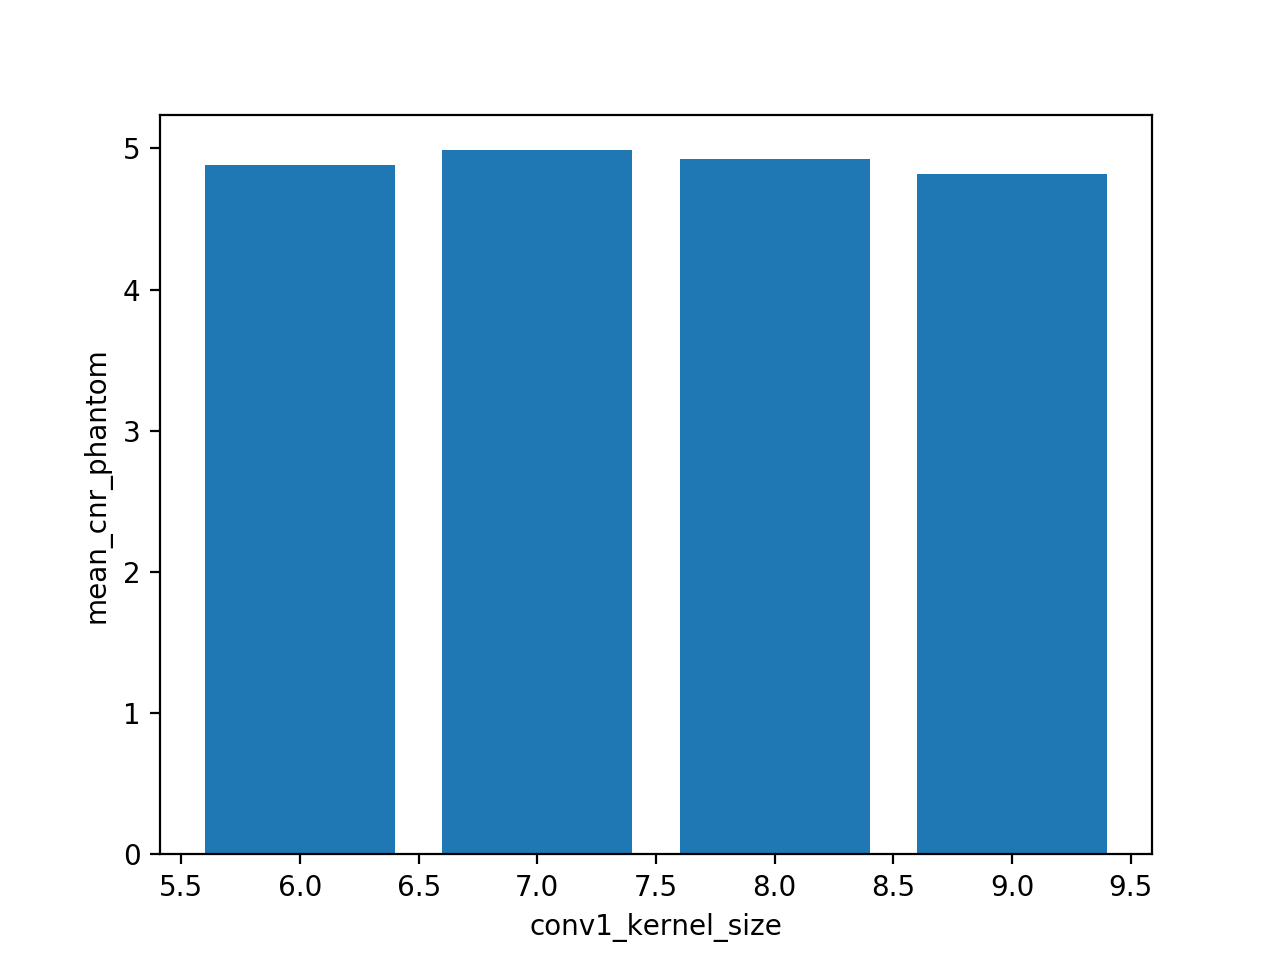

<IPython.core.display.Javascript object>


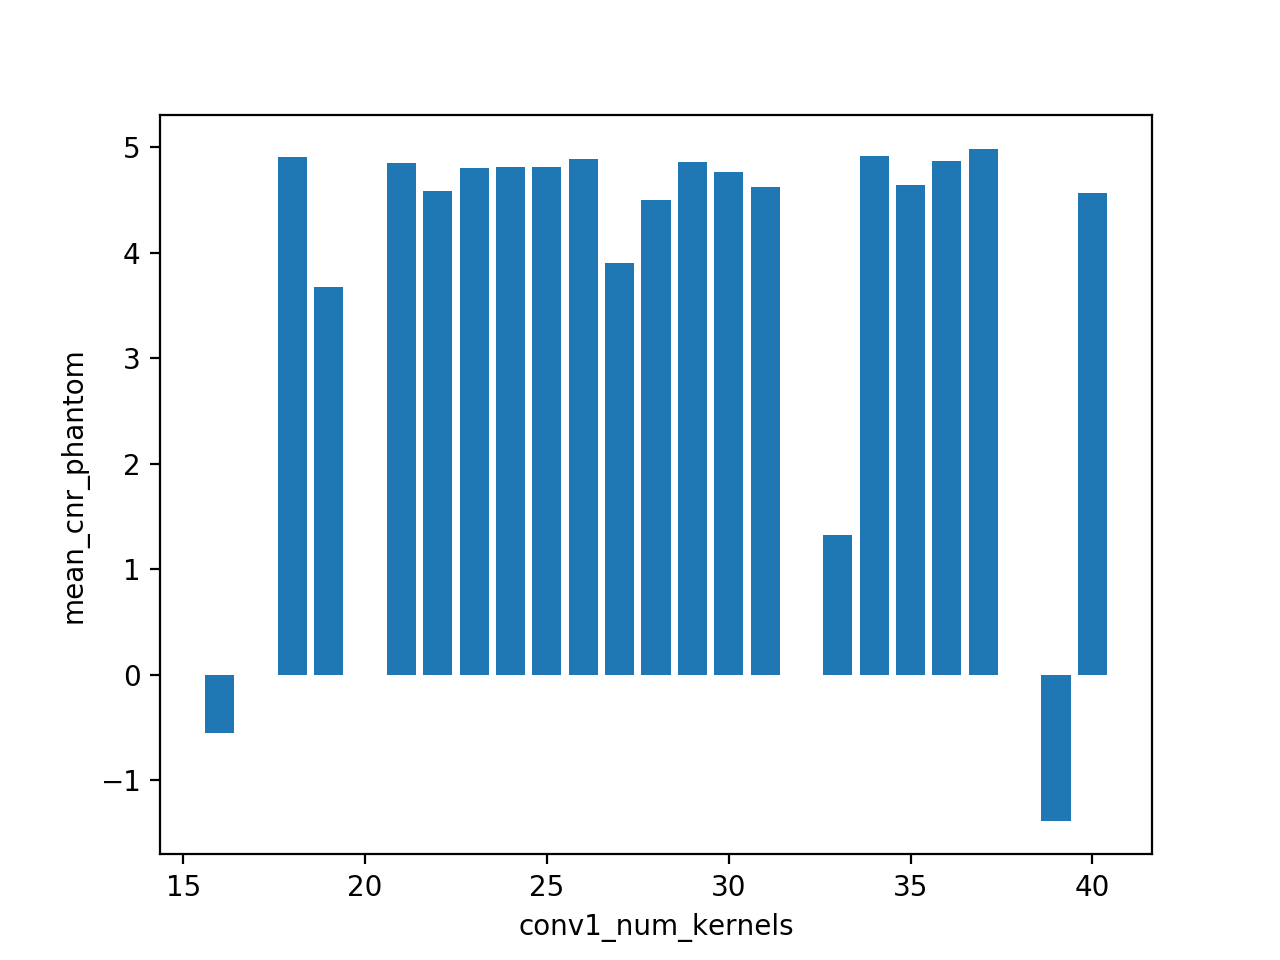

<IPython.core.display.Javascript object>


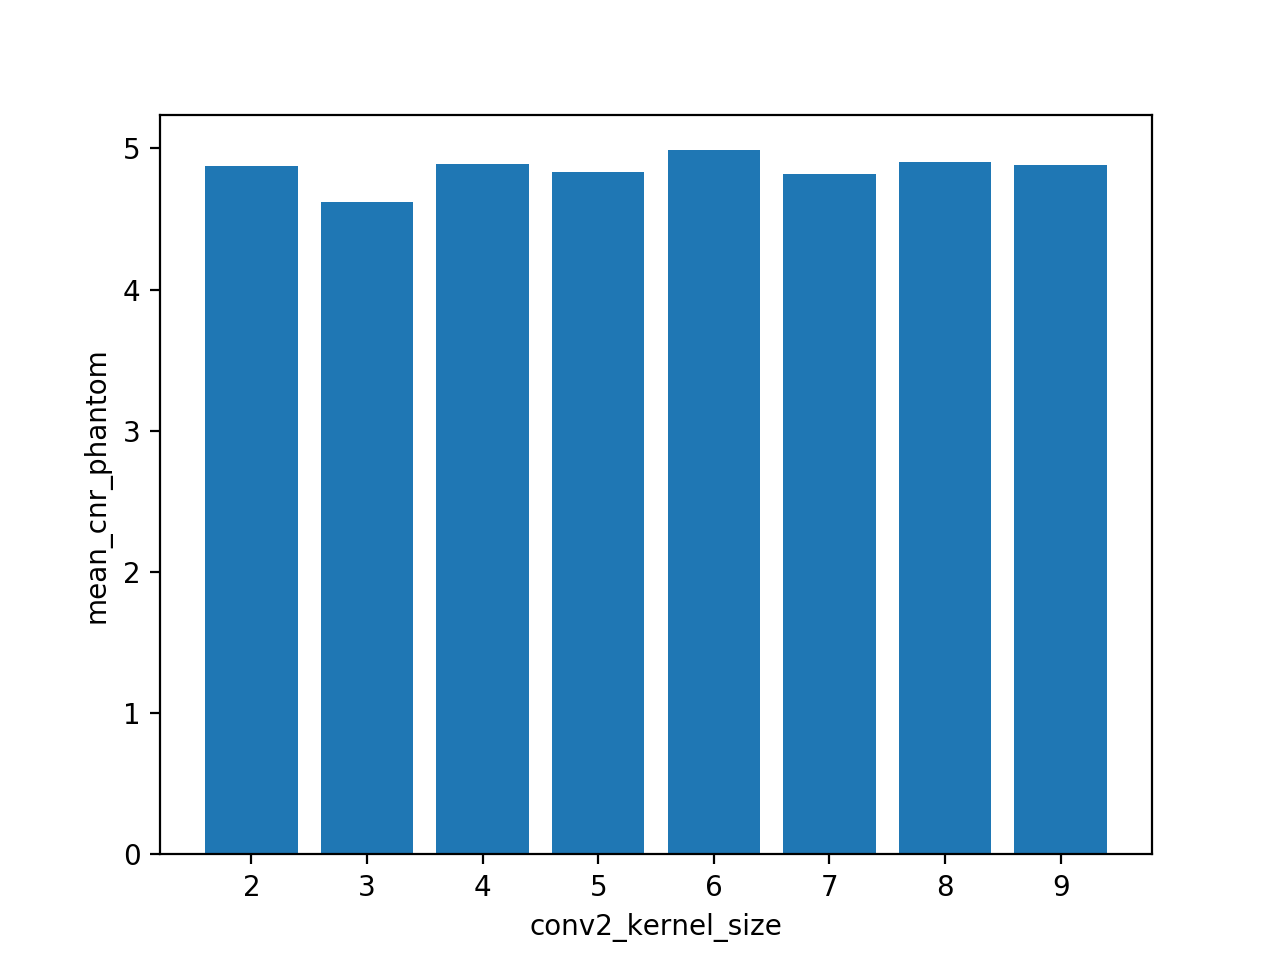

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


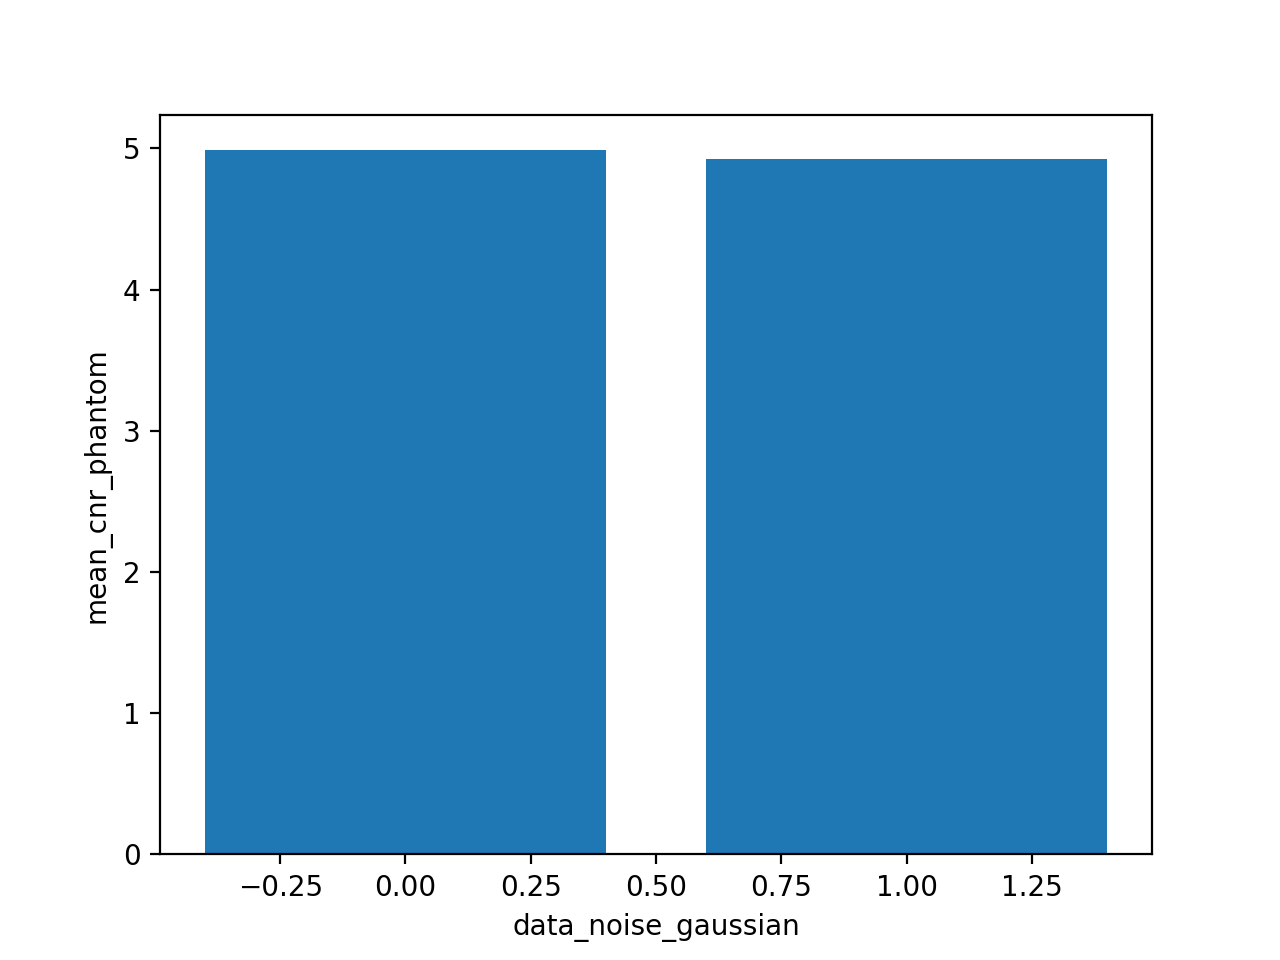

<IPython.core.display.Javascript object>


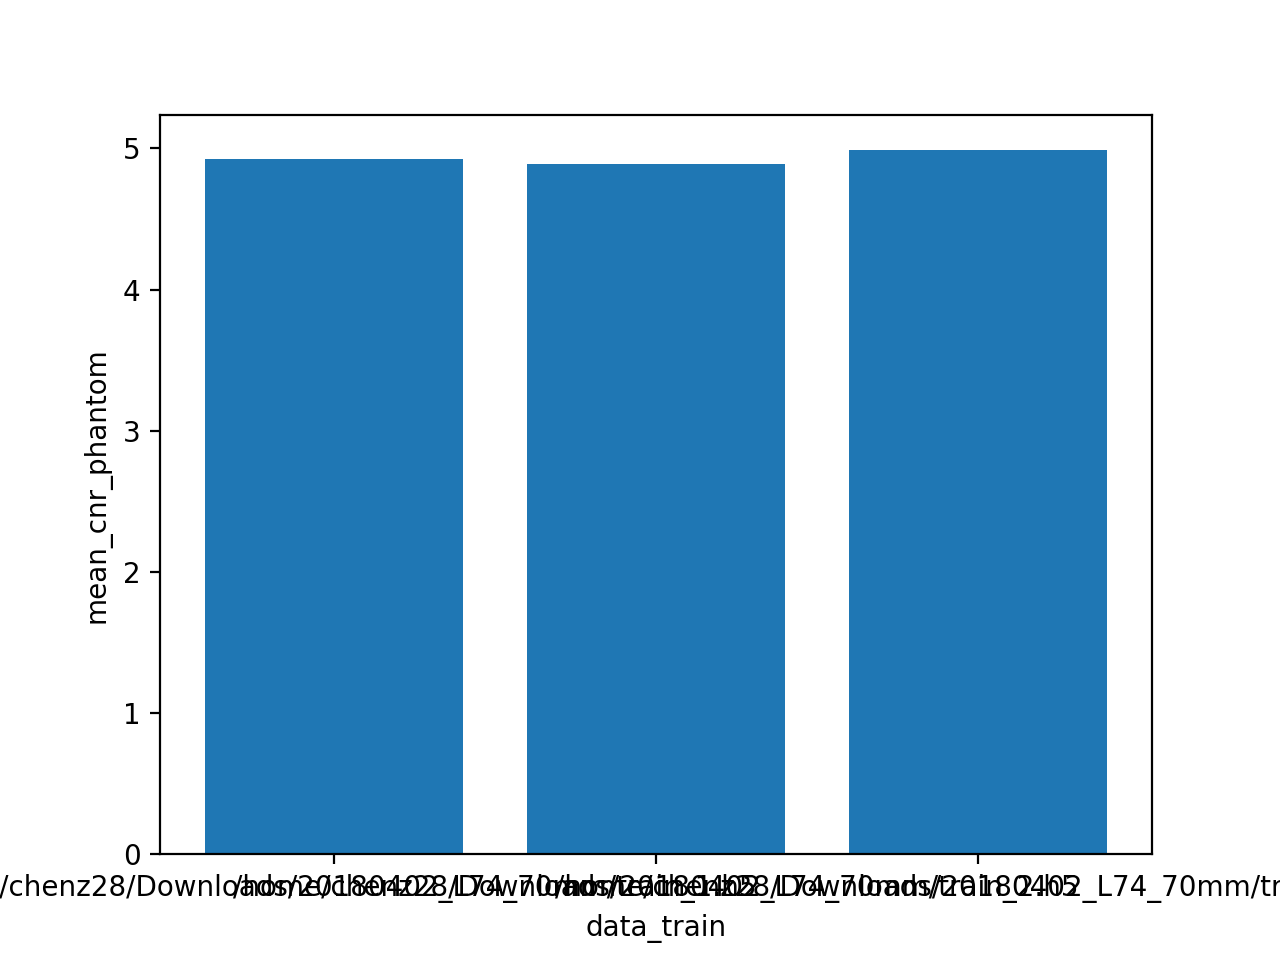

<IPython.core.display.Javascript object>


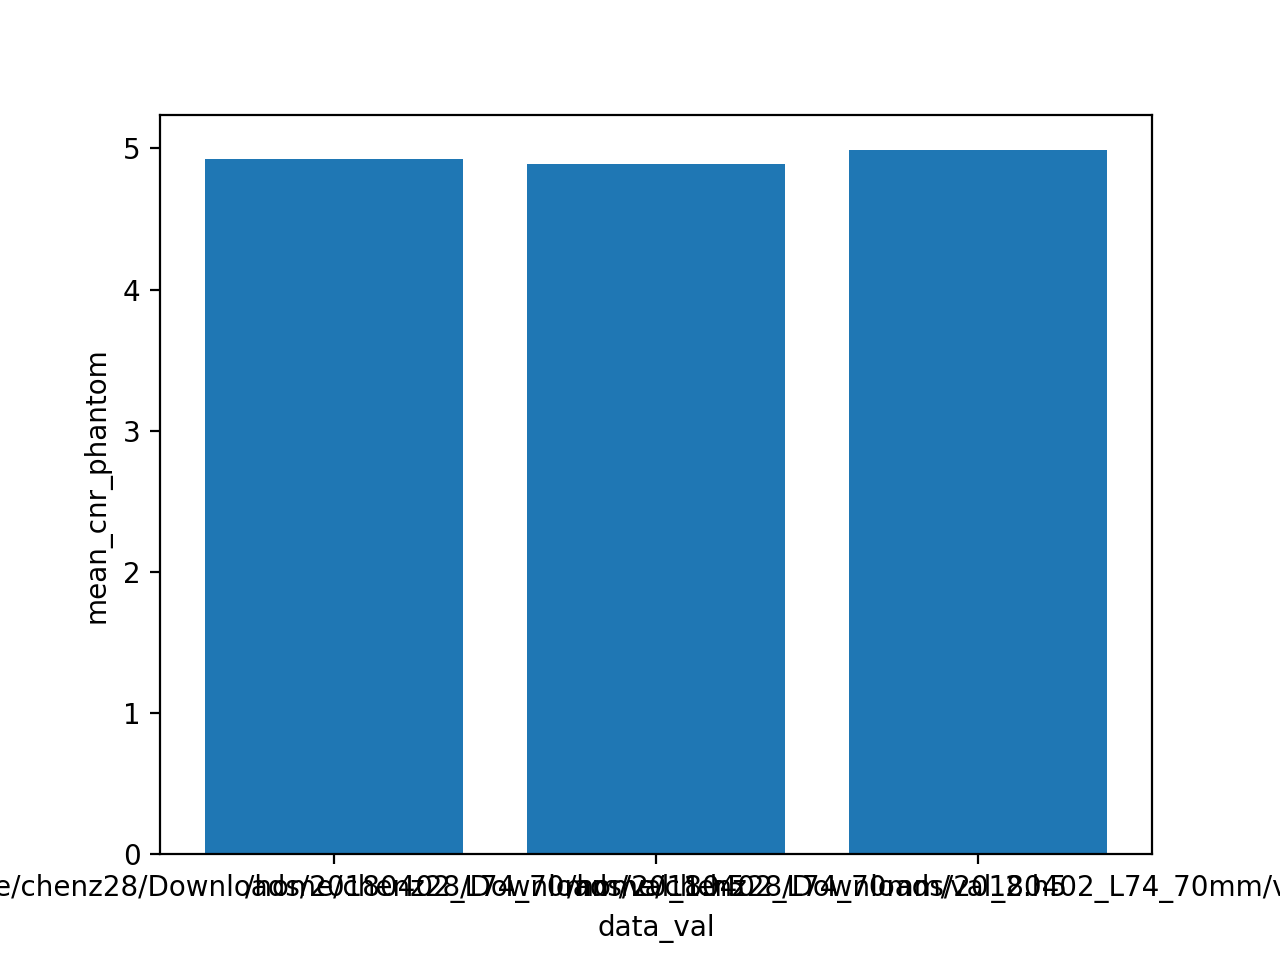

<IPython.core.display.Javascript object>


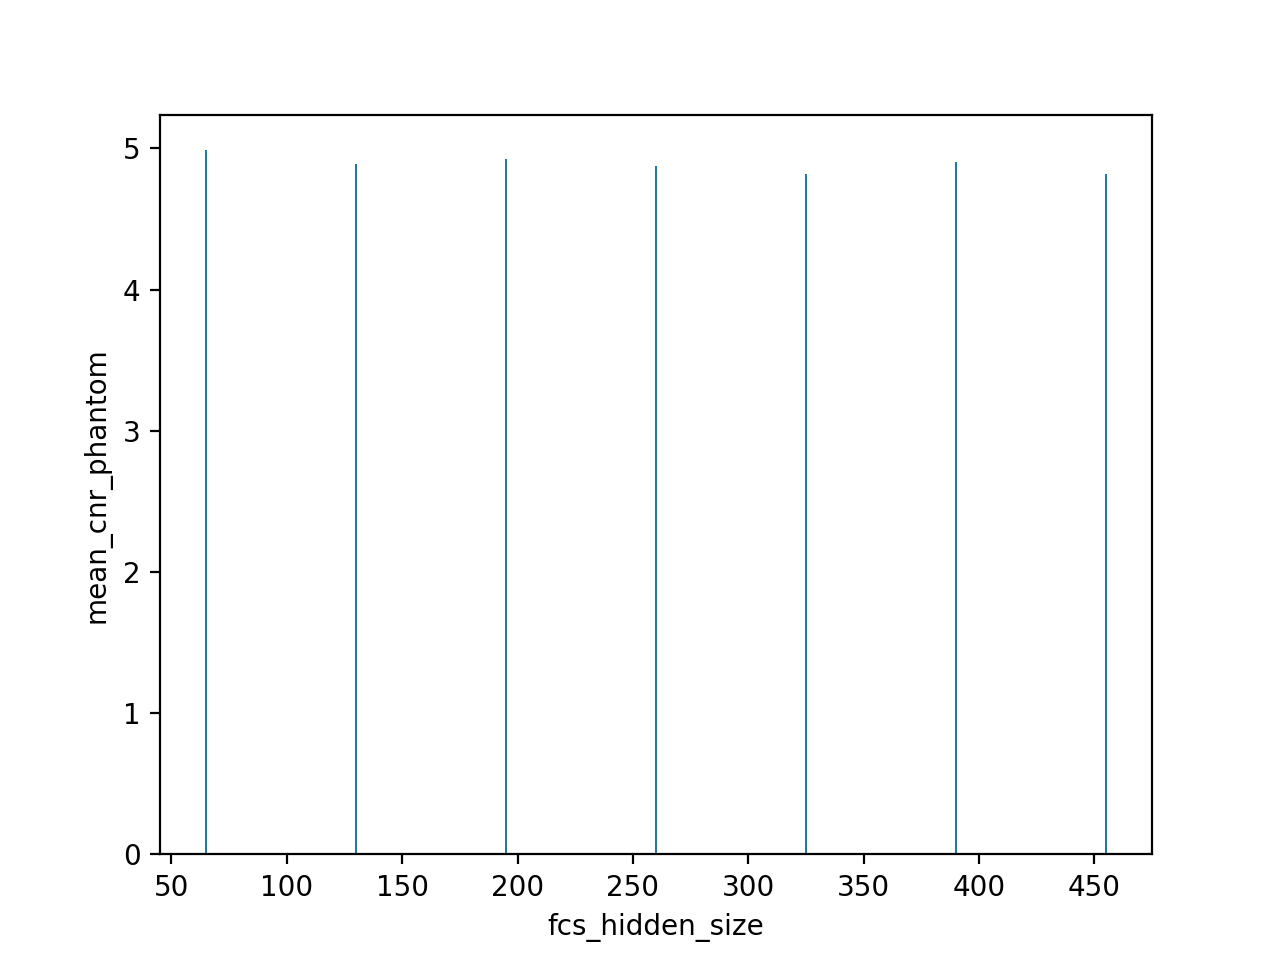

<IPython.core.display.Javascript object>


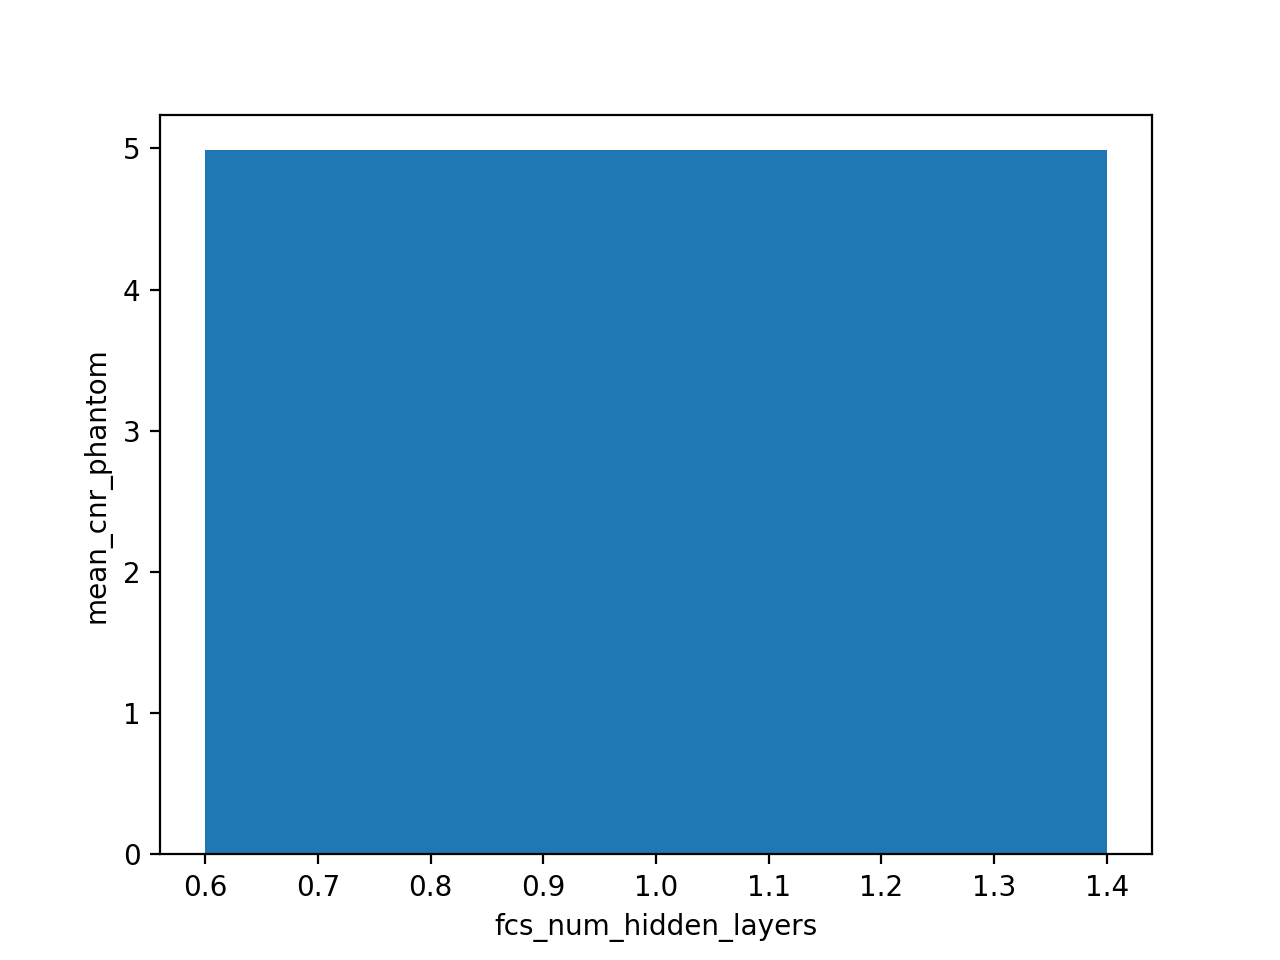

<IPython.core.display.Javascript object>


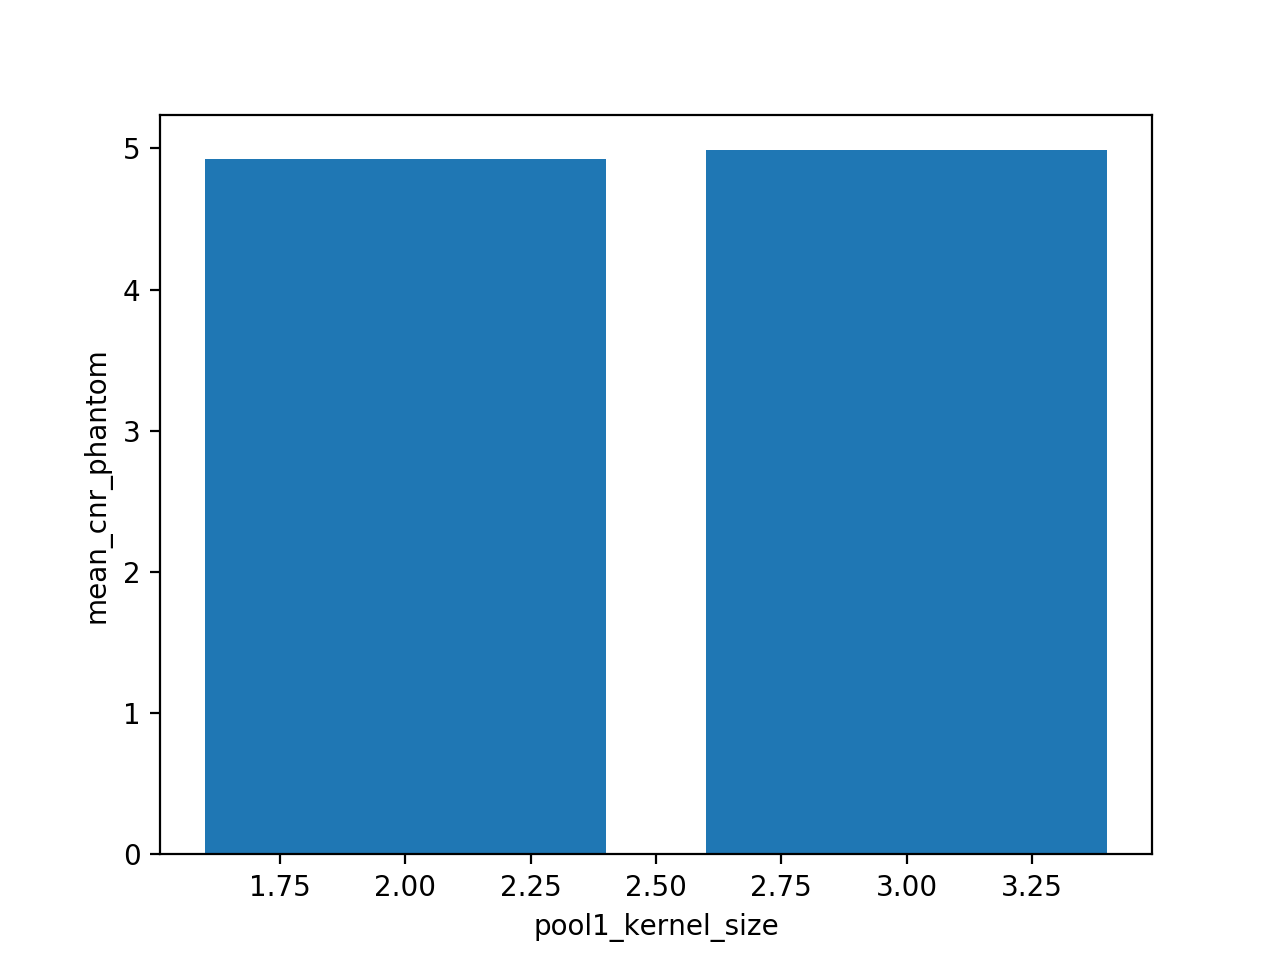

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


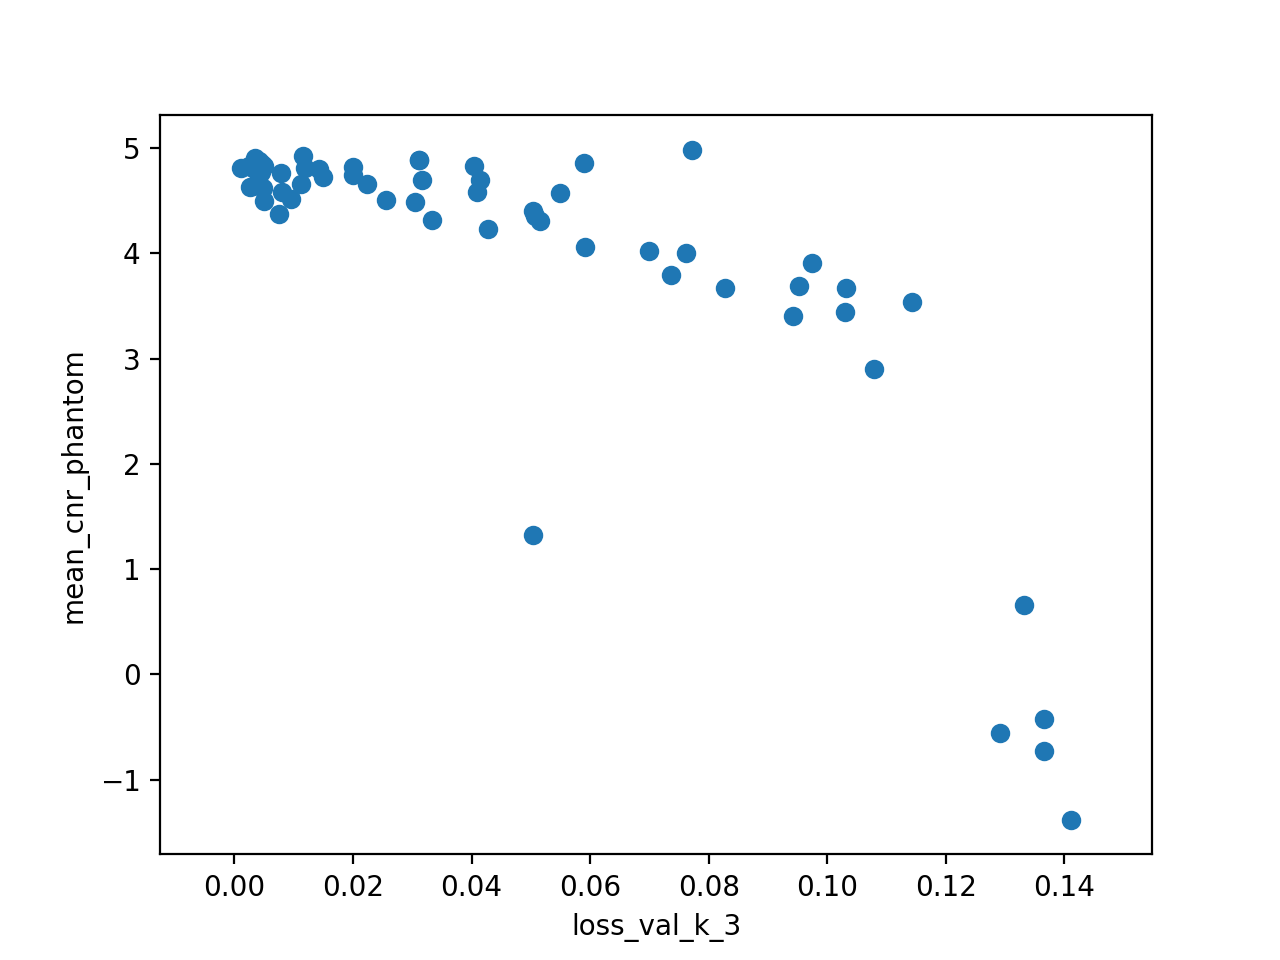

<IPython.core.display.Javascript object>


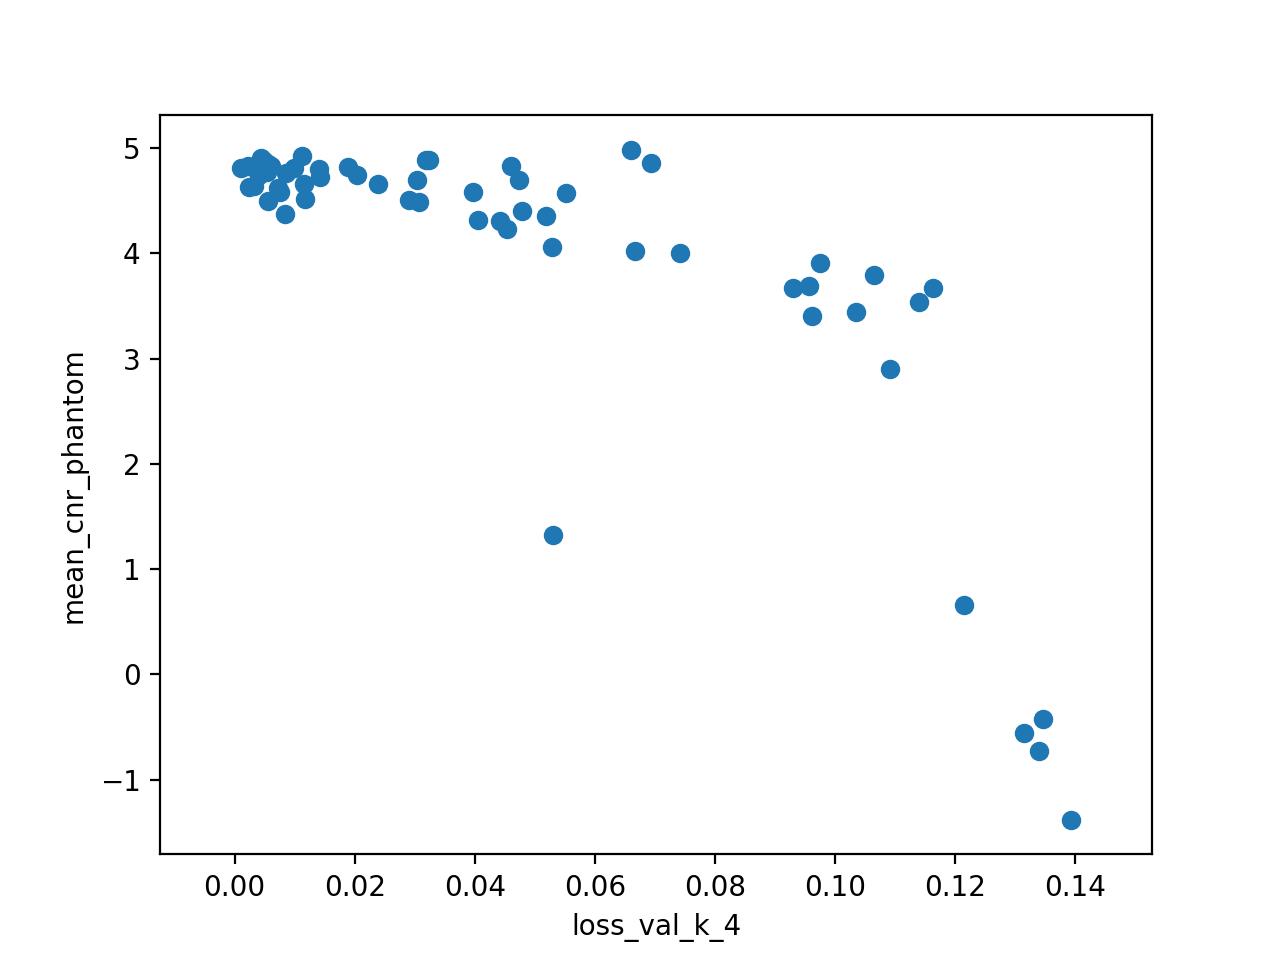

<IPython.core.display.Javascript object>


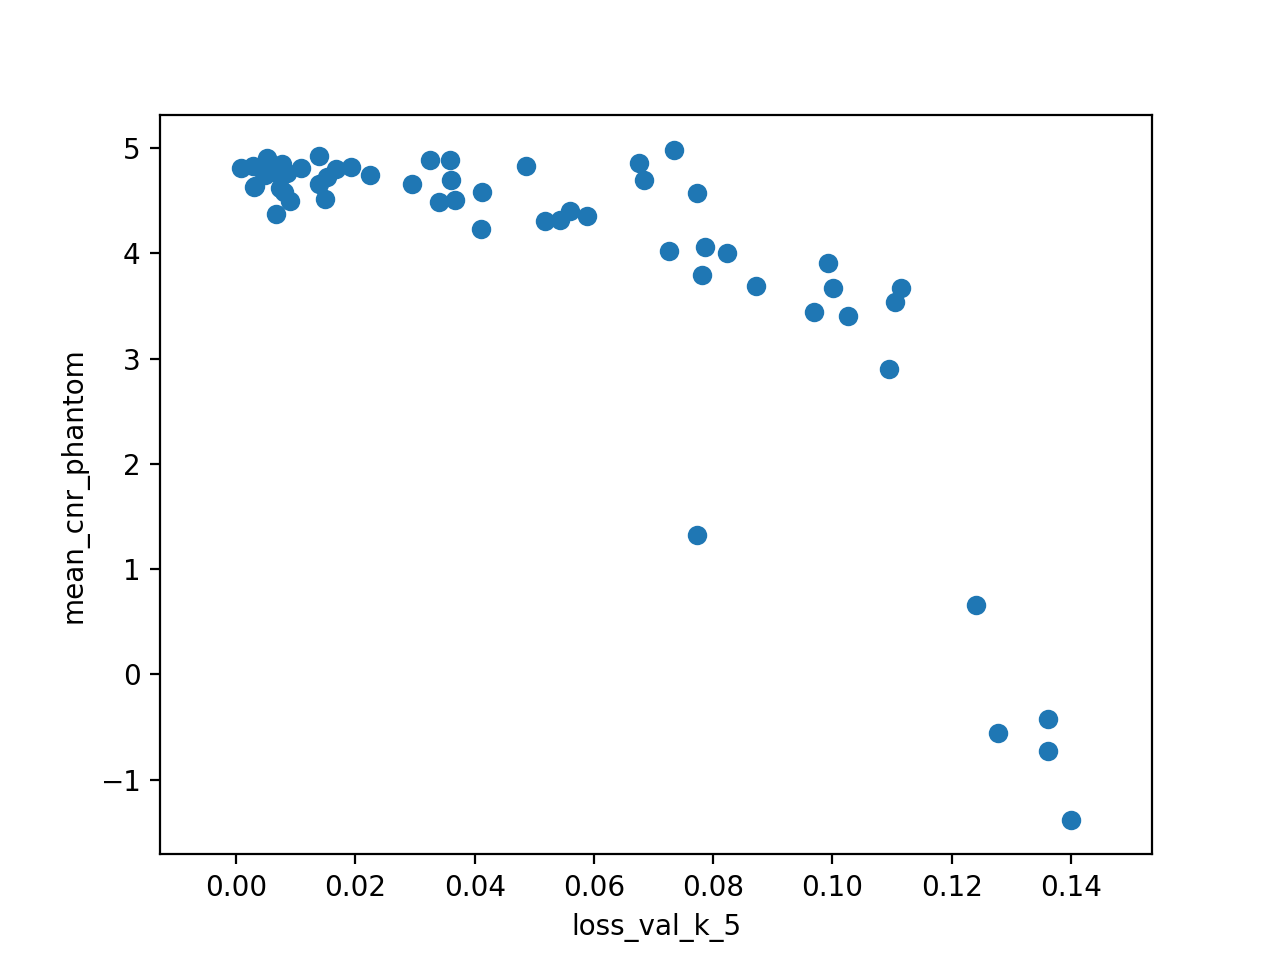

In [15]:
plot_merged_cnr_hyperparameters(df, 'mean_cnr_phantom', hyperparams, ylim=None)

# In vivo CNR as a Function of Hyperparameters

/Users/zhanwenchen/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


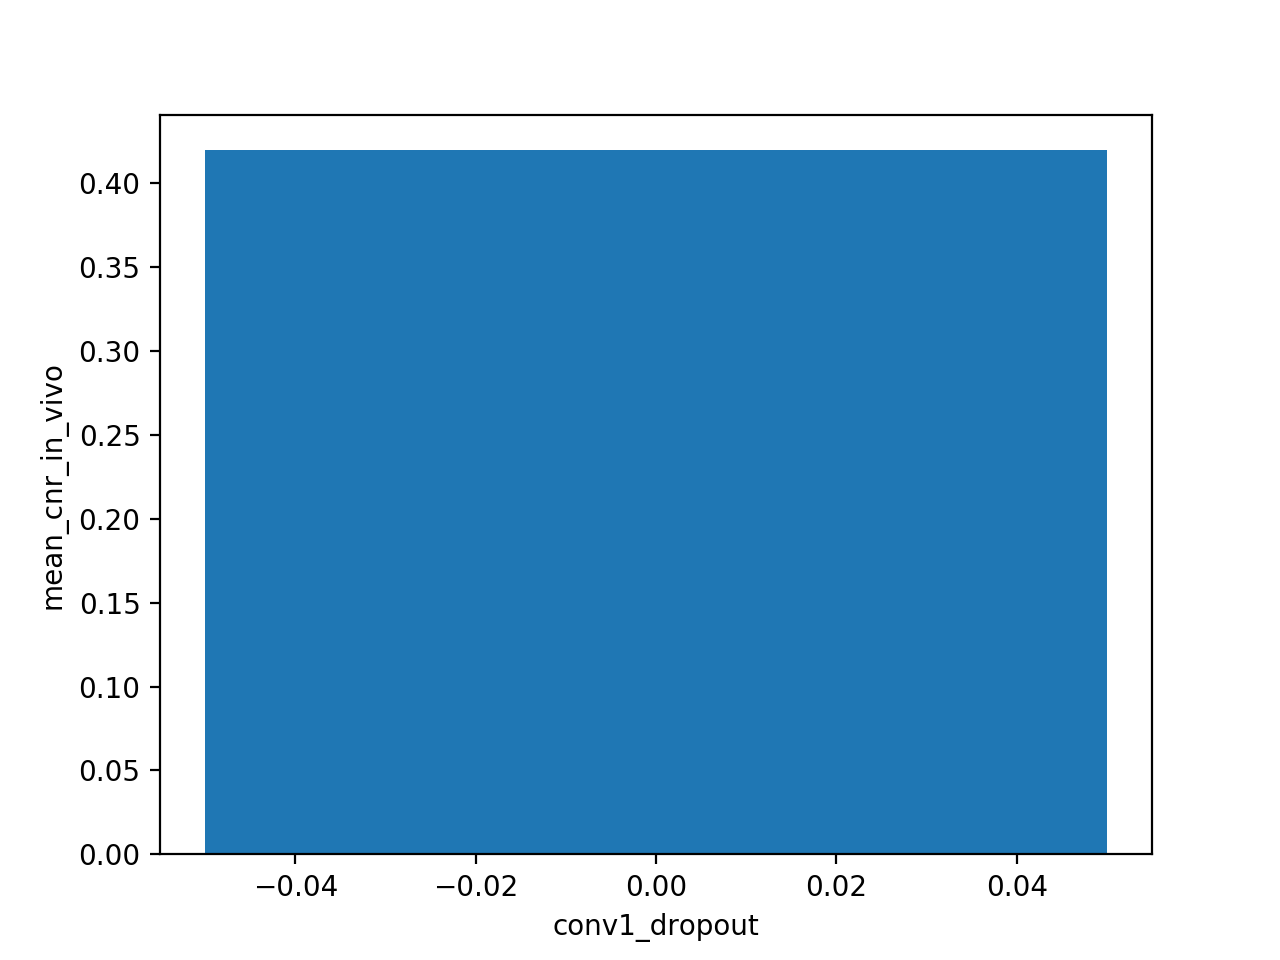

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


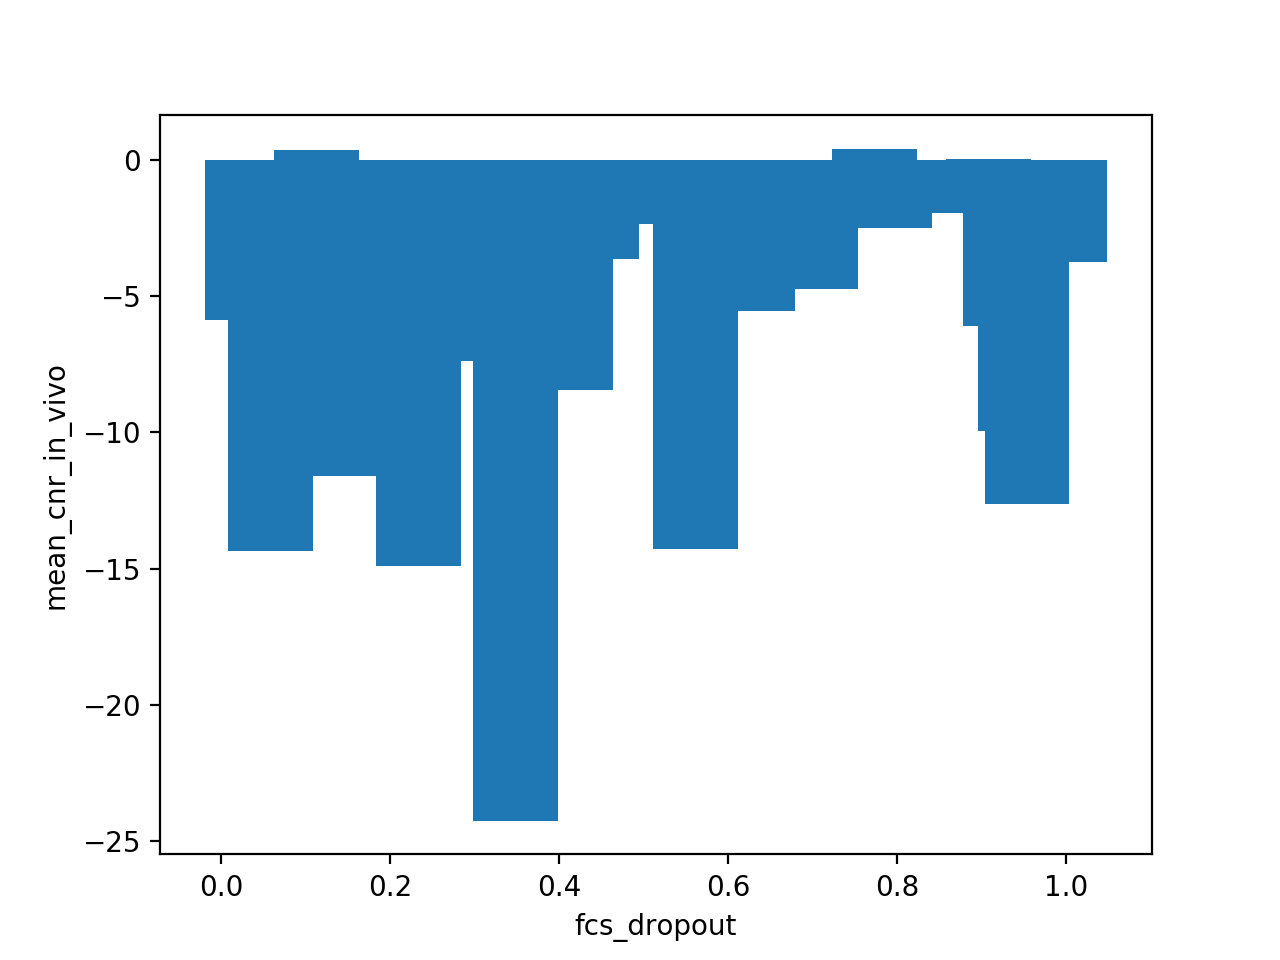

<IPython.core.display.Javascript object>


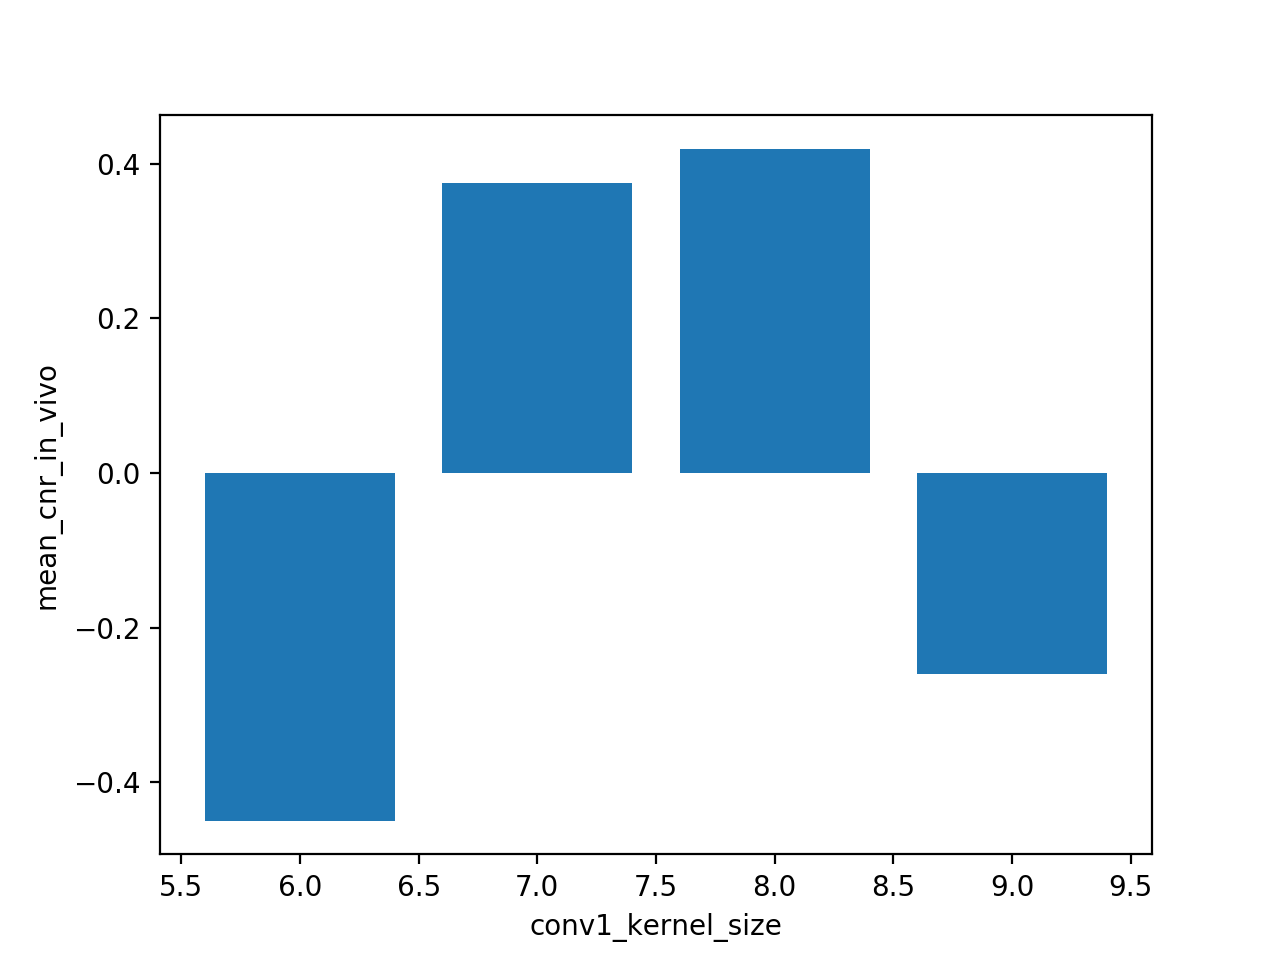

<IPython.core.display.Javascript object>


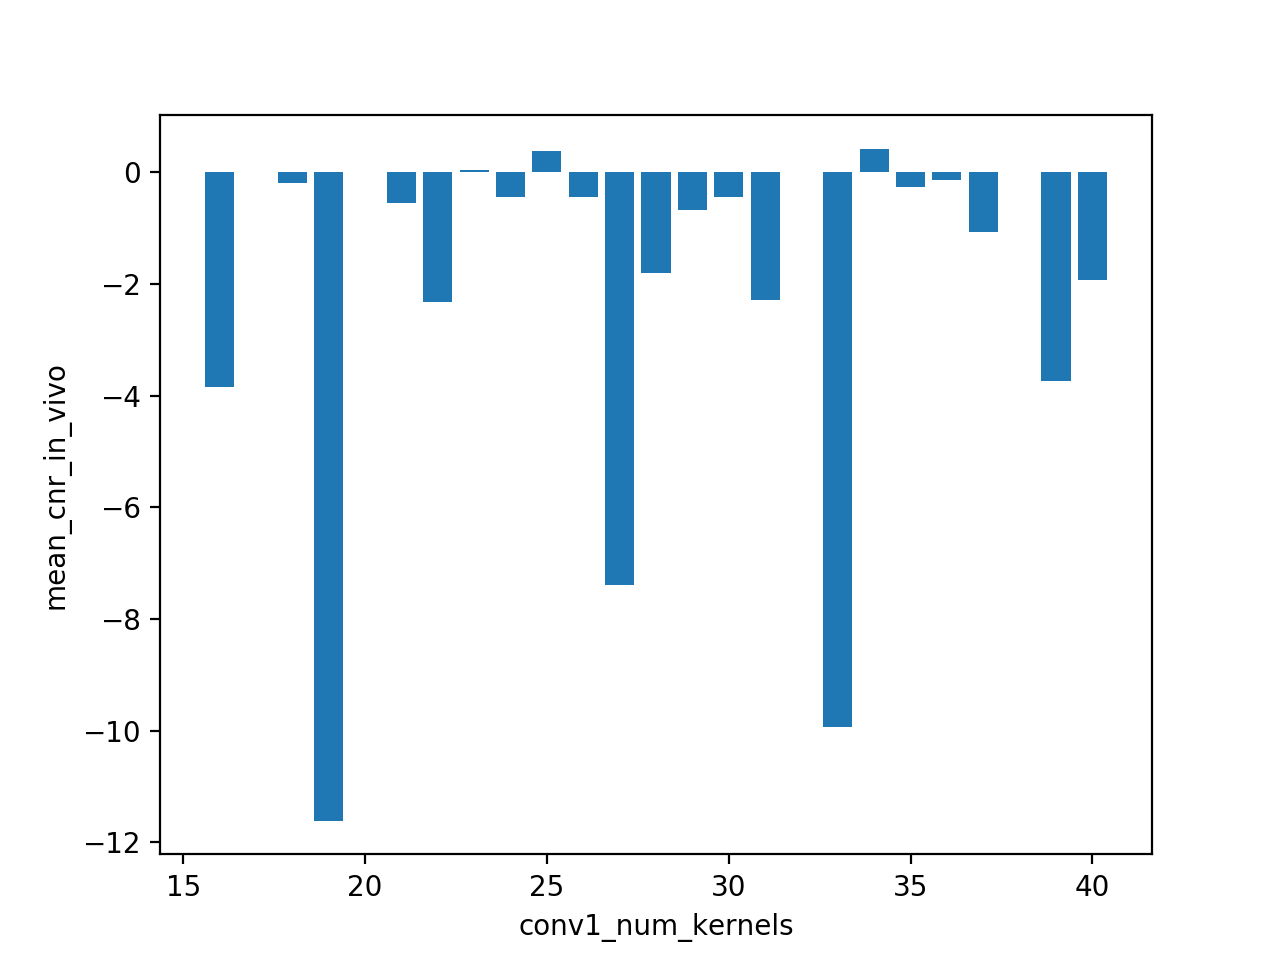

<IPython.core.display.Javascript object>


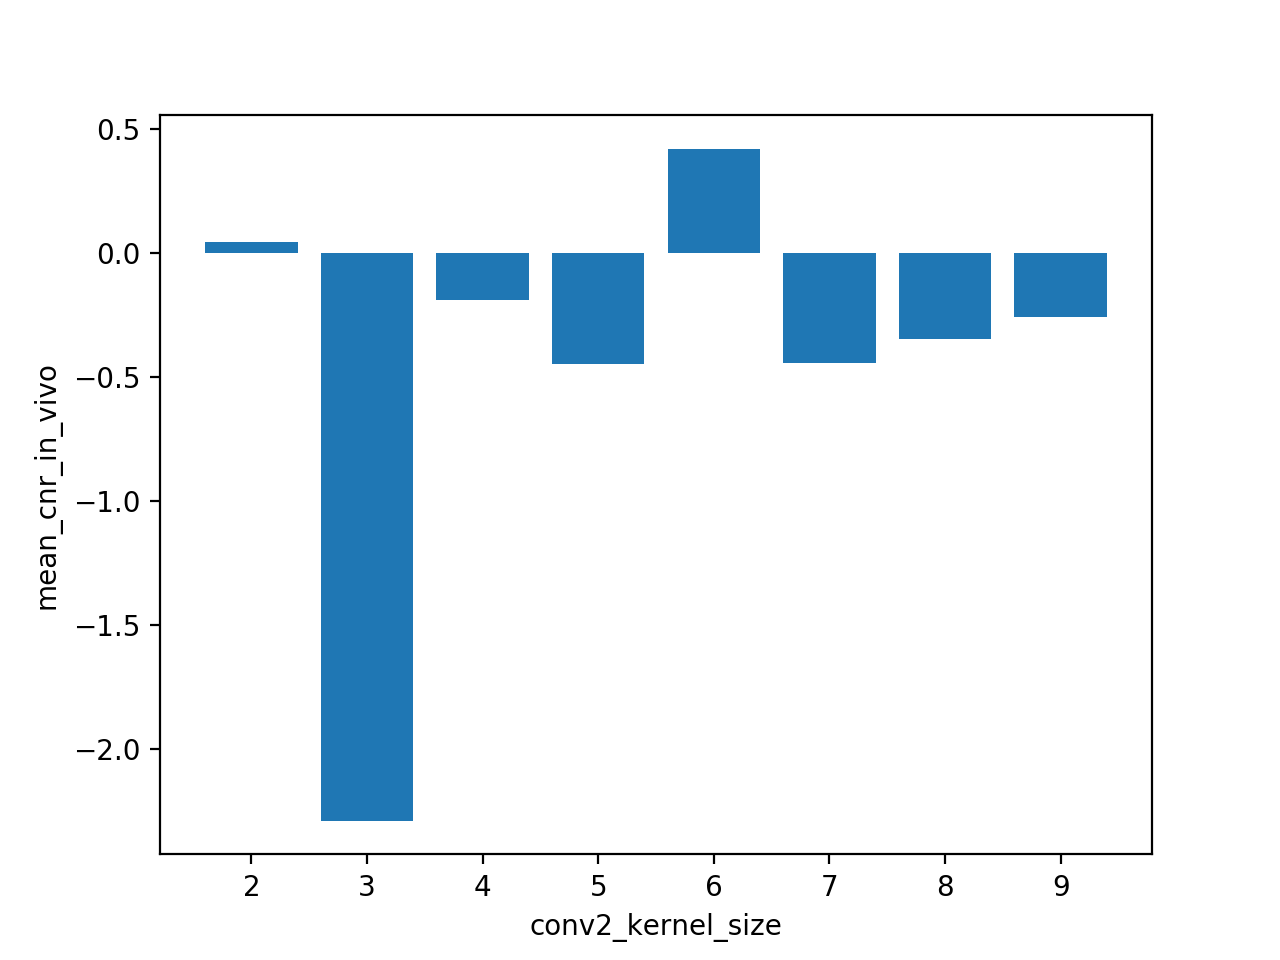

<IPython.core.display.Javascript object>


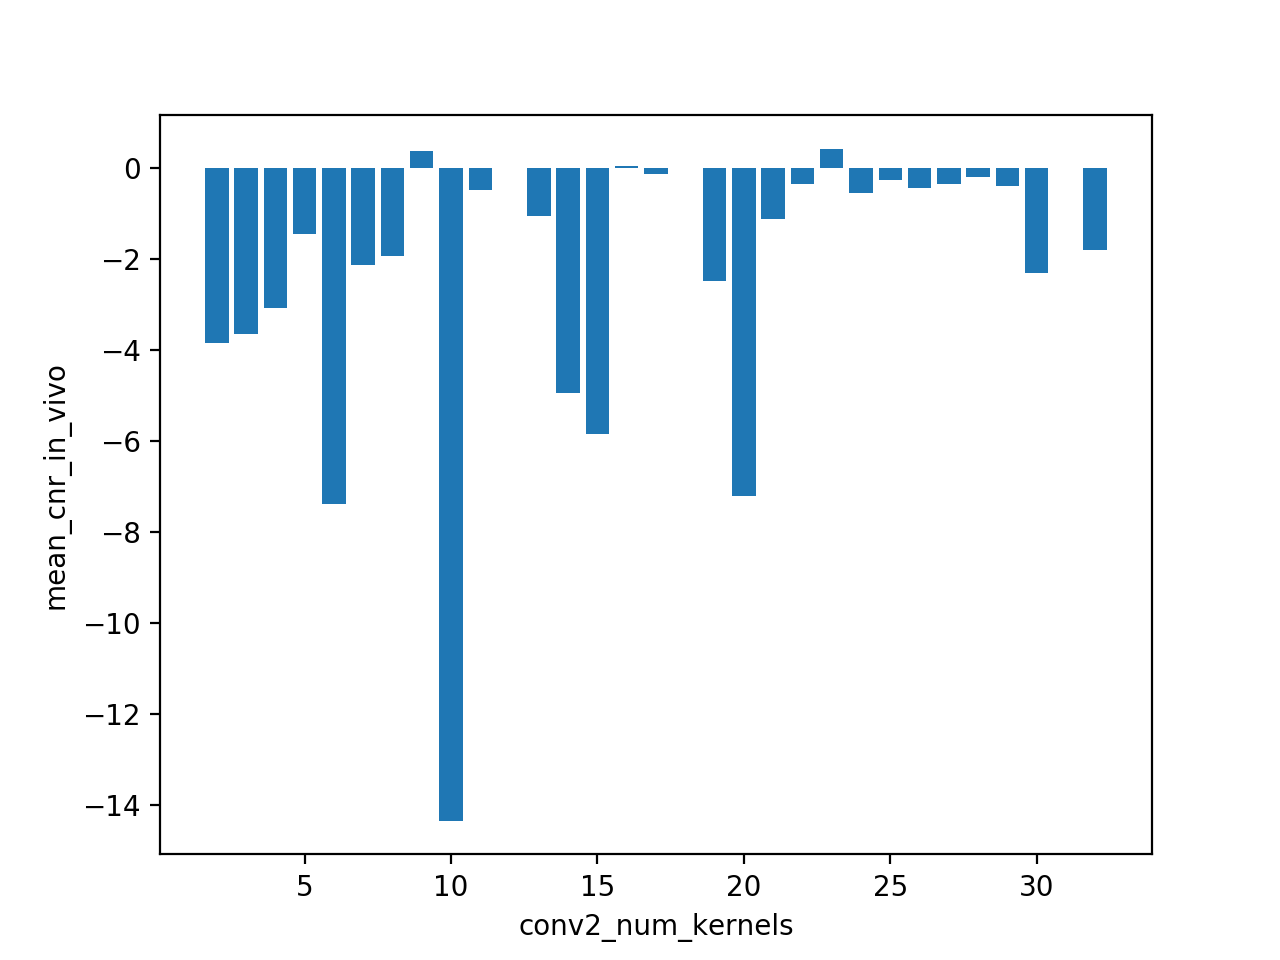

<IPython.core.display.Javascript object>


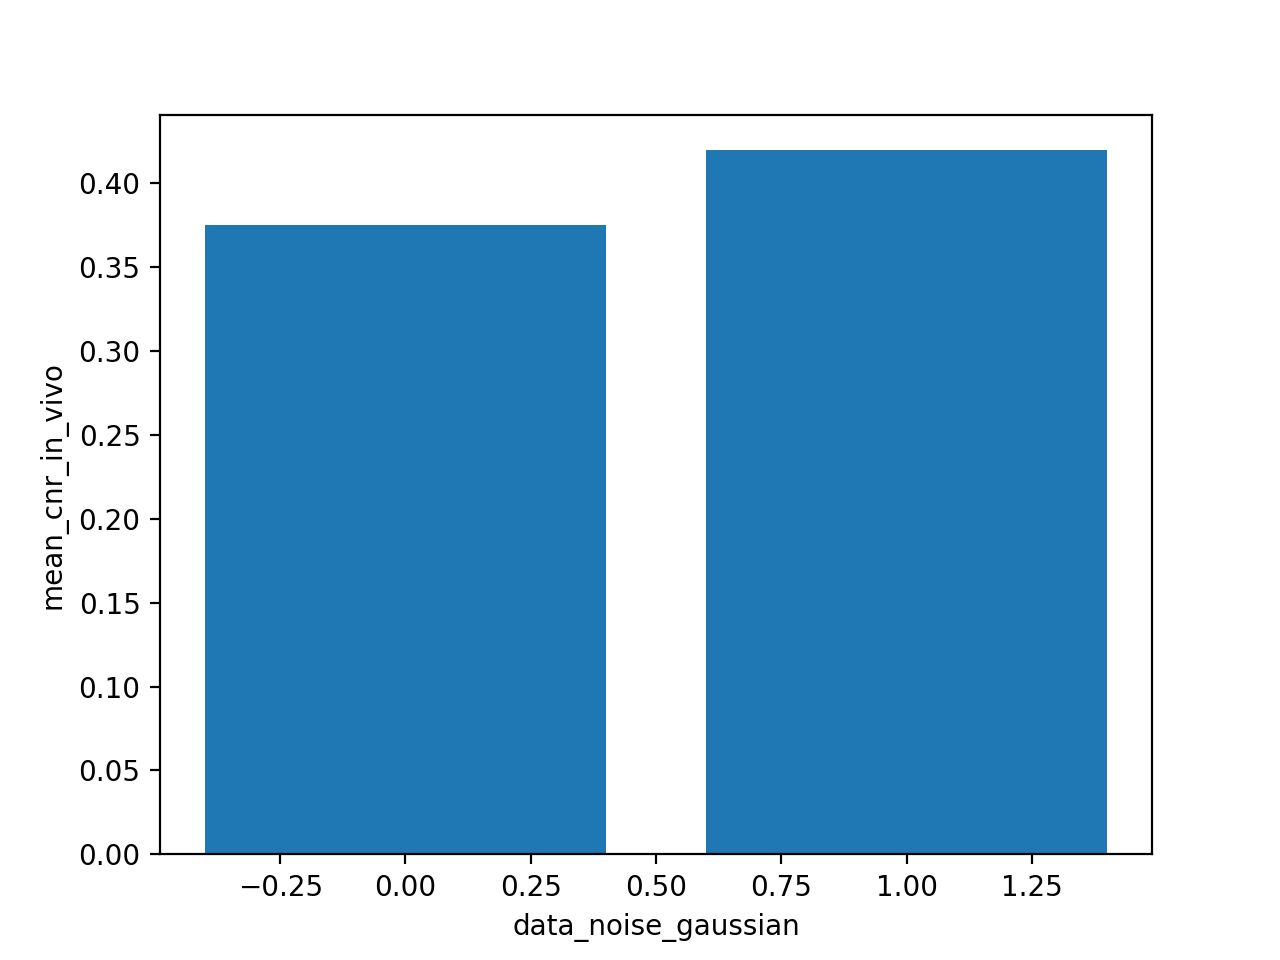

<IPython.core.display.Javascript object>


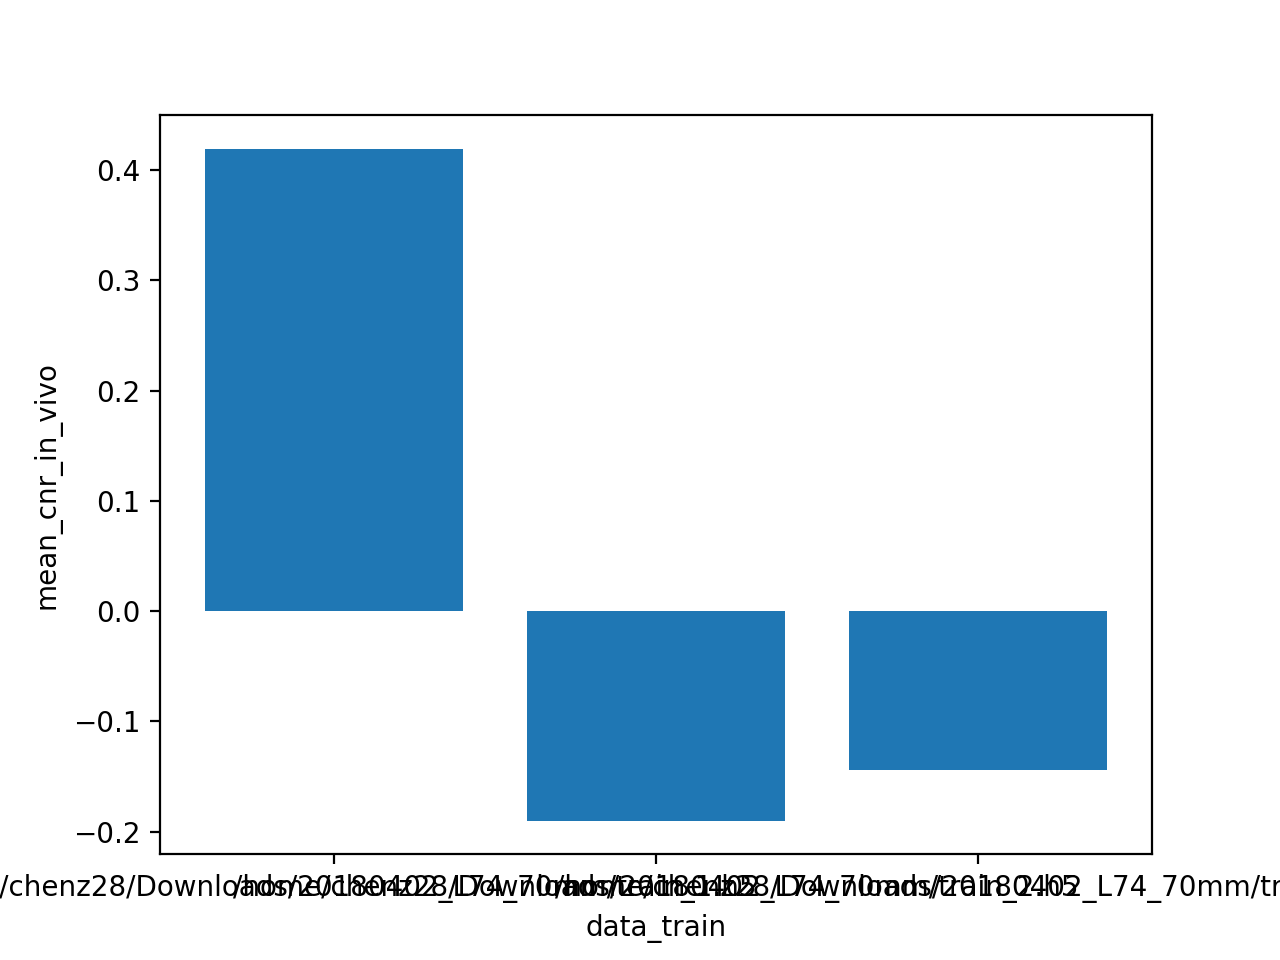

<IPython.core.display.Javascript object>


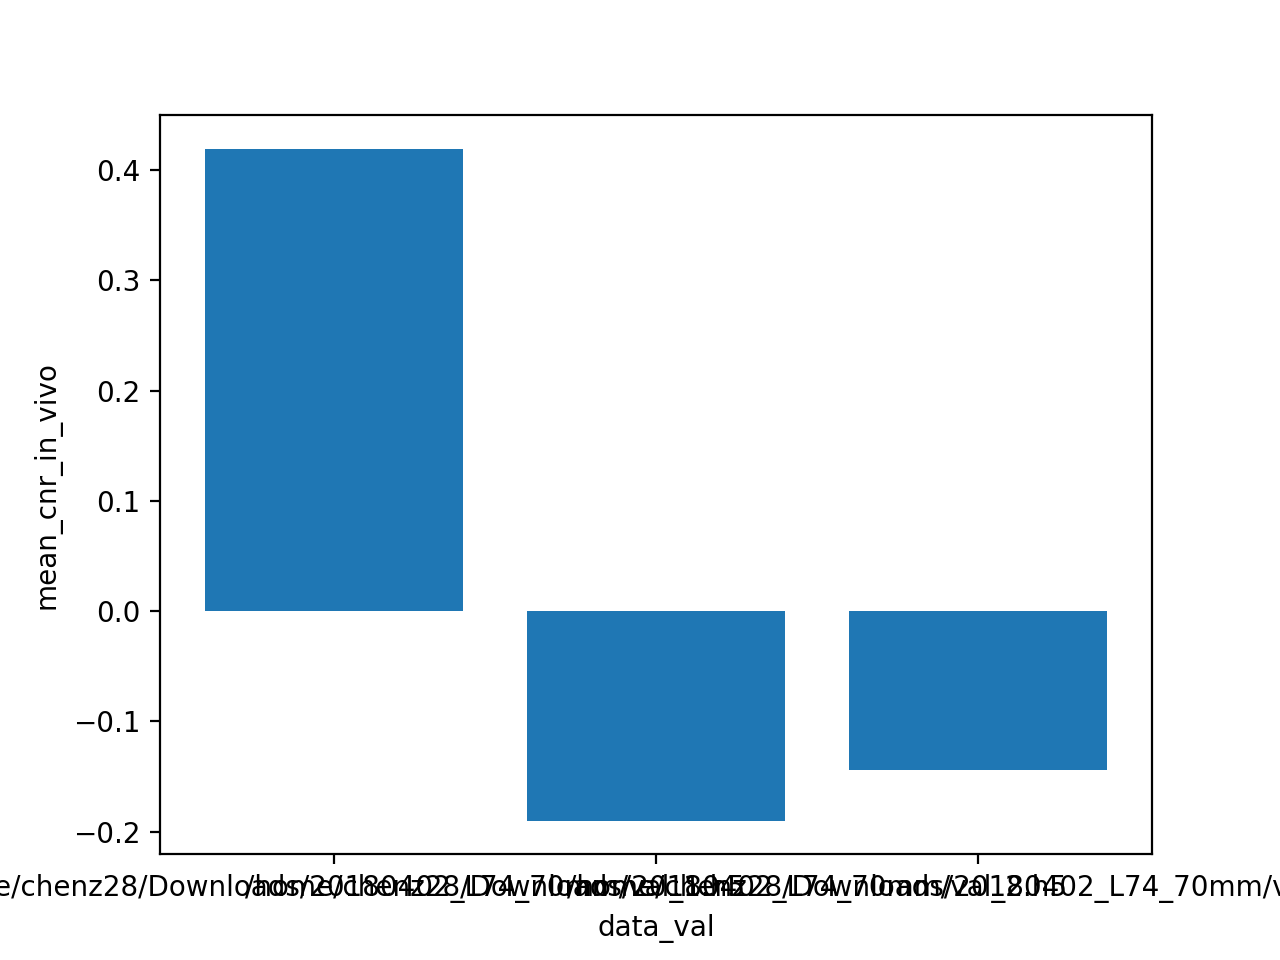

<IPython.core.display.Javascript object>


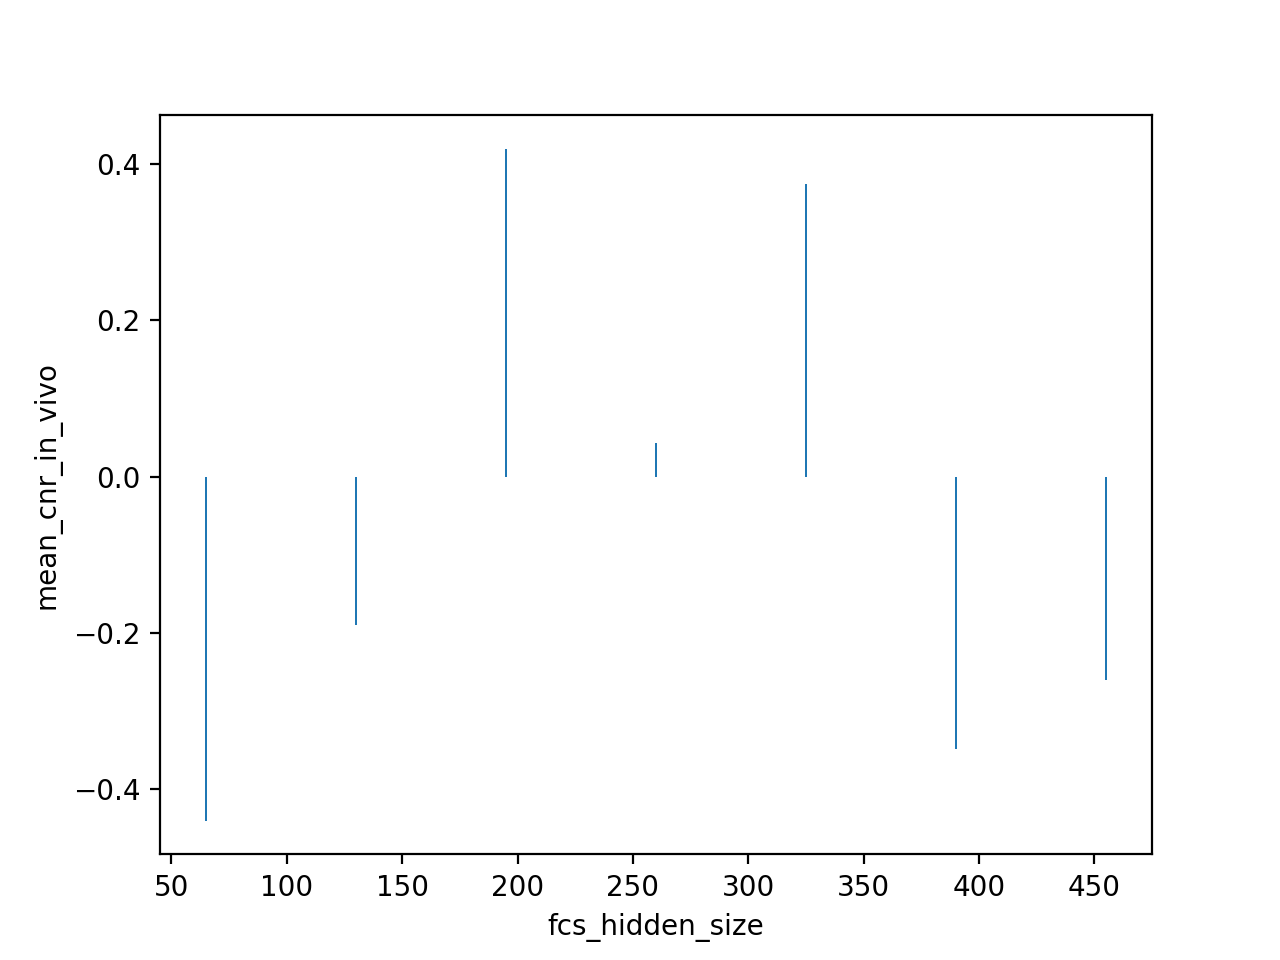

<IPython.core.display.Javascript object>


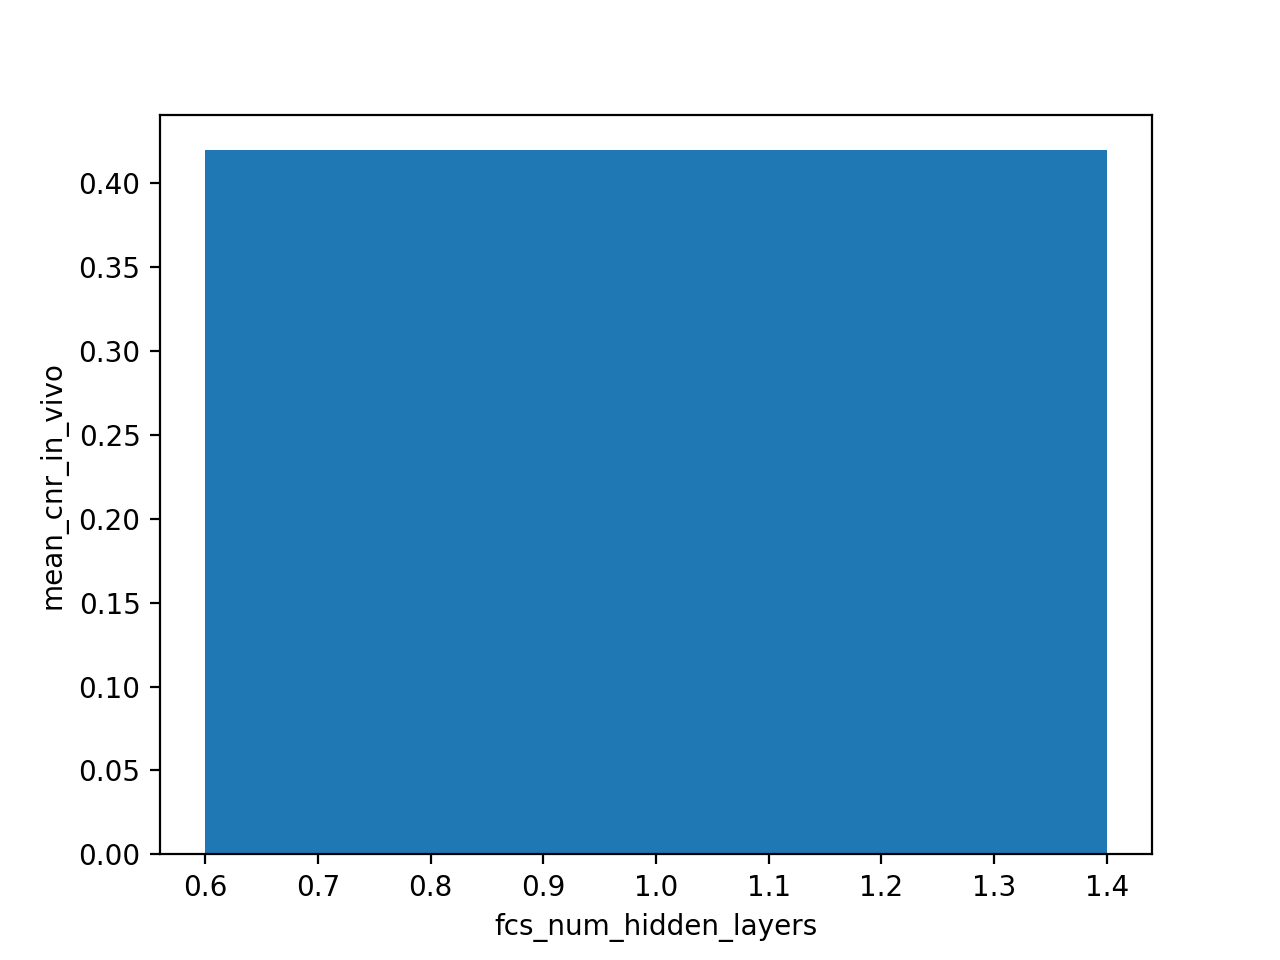

<IPython.core.display.Javascript object>


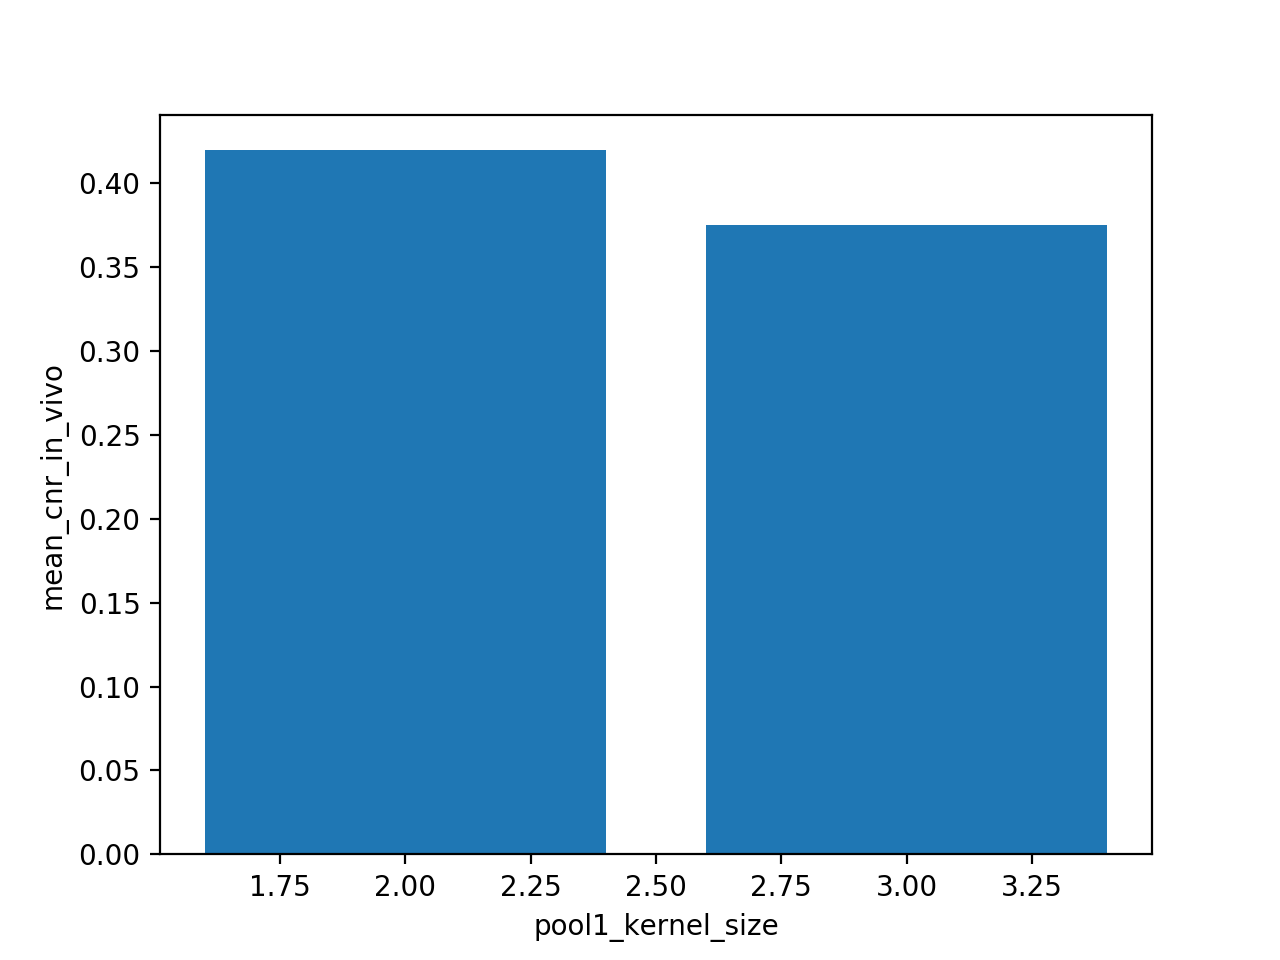

<IPython.core.display.Javascript object>


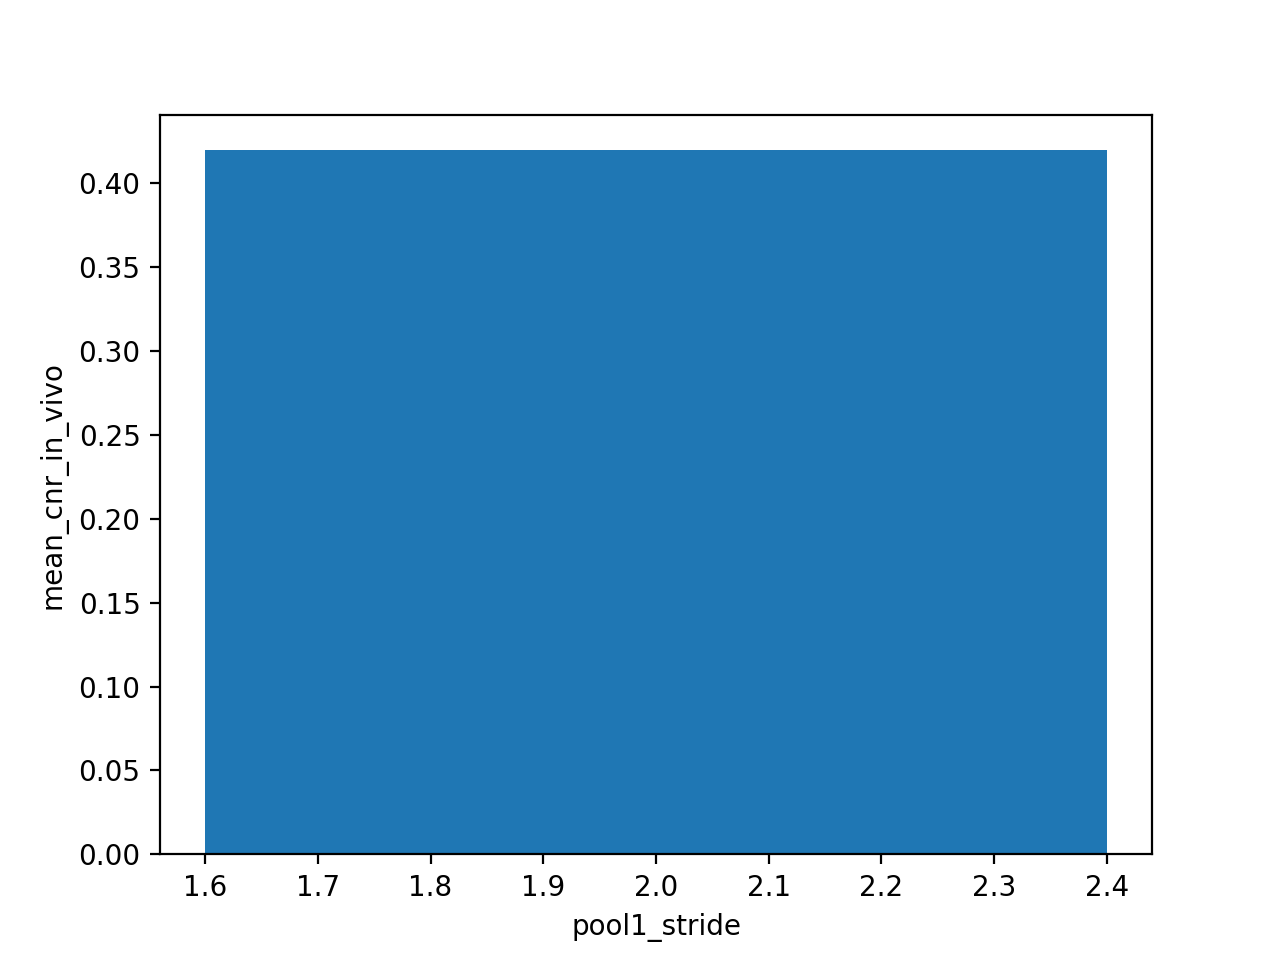

<IPython.core.display.Javascript object>


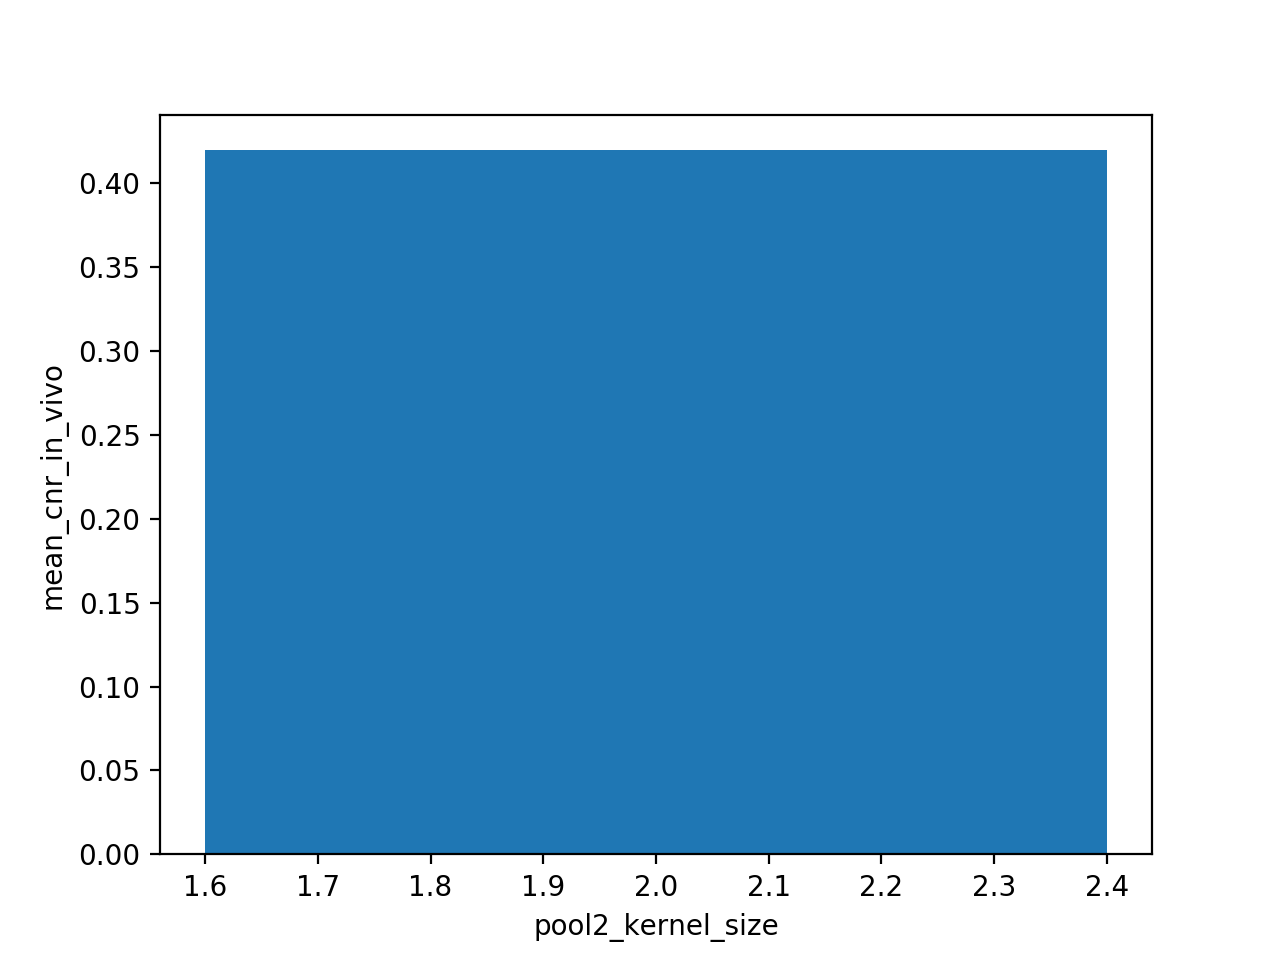

<IPython.core.display.Javascript object>


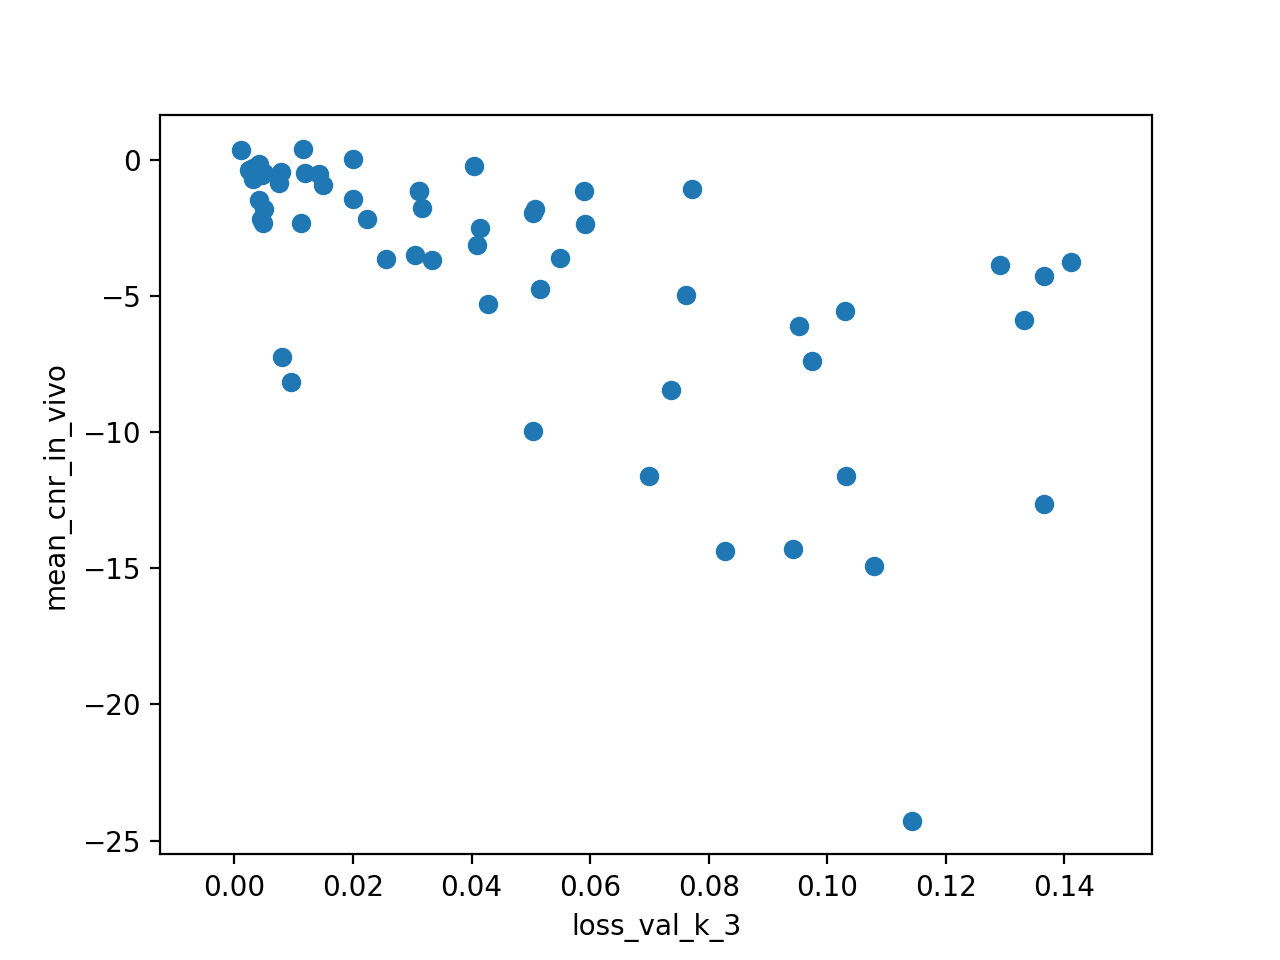

<IPython.core.display.Javascript object>


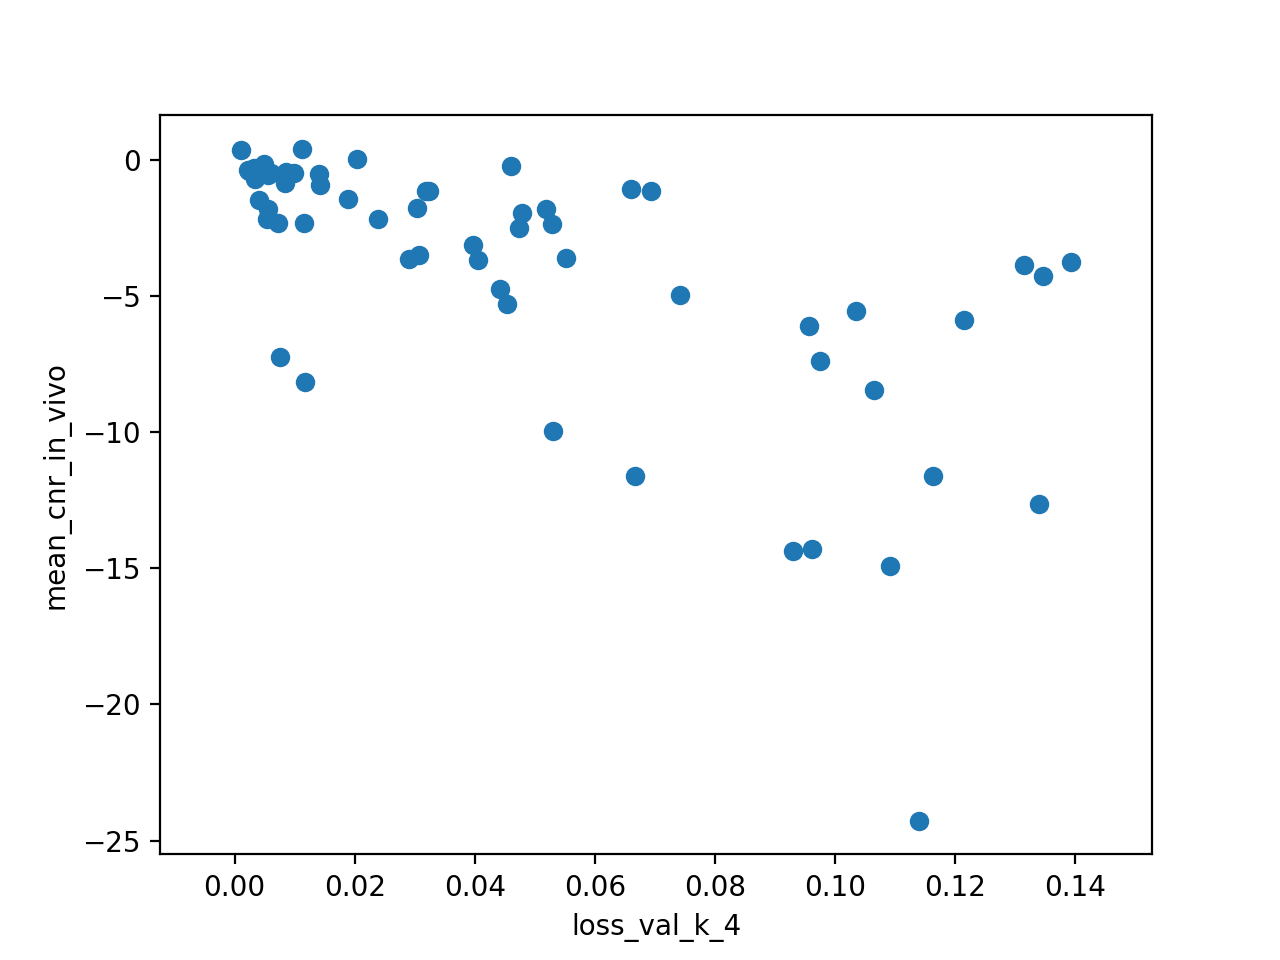

<IPython.core.display.Javascript object>


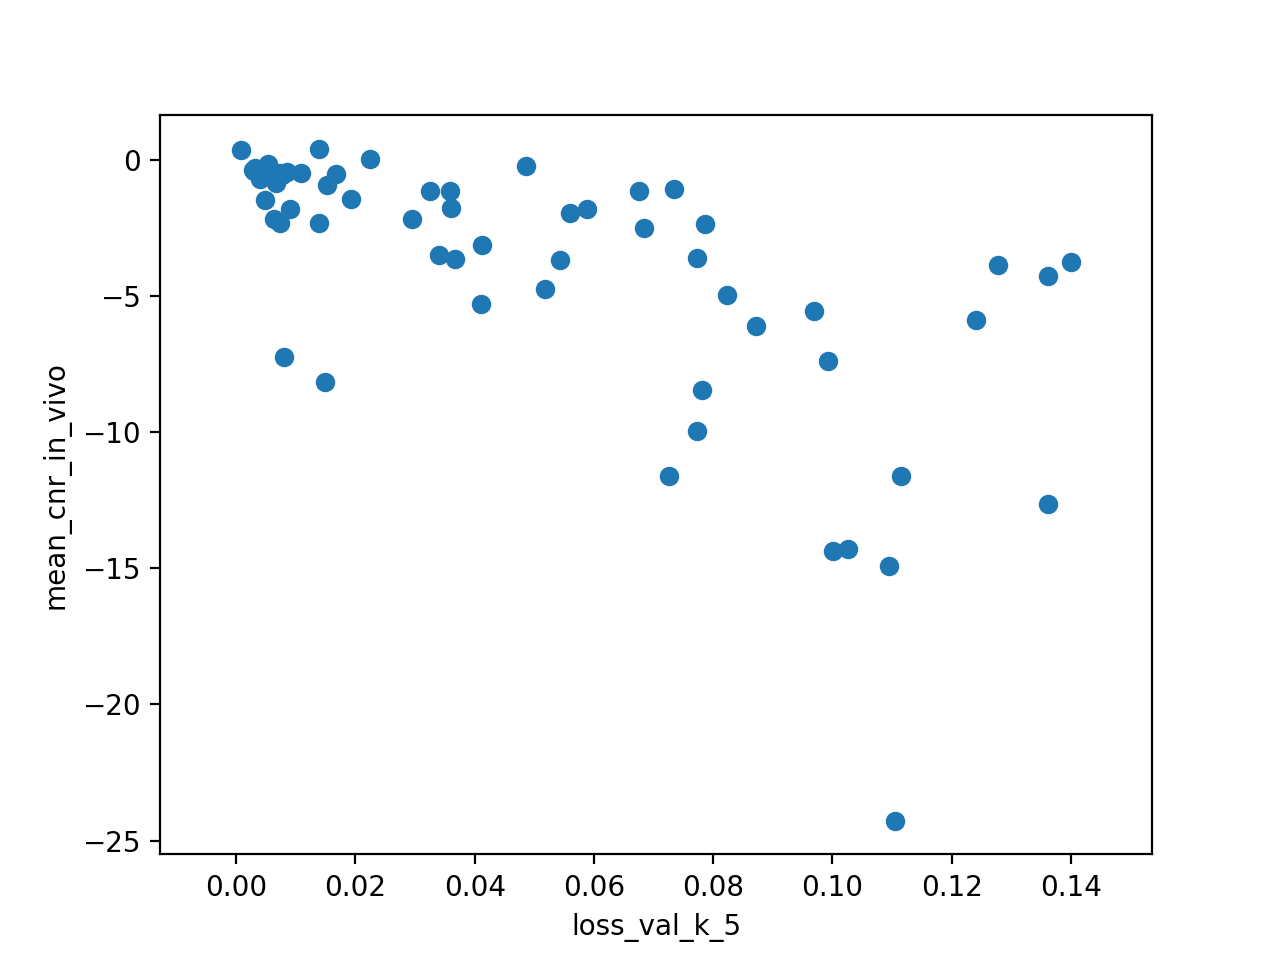

In [16]:
plot_merged_cnr_hyperparameters(df, 'mean_cnr_in_vivo', hyperparams, ylim=None)